# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [14]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.
from google.colab import files
uploaded = files.upload()


Saving my_image.jpeg to my_image (3).jpeg


In [15]:
import base64

filename = "my_image.jpeg"

with open(filename, "rb") as img_file:
    base64_str = base64.b64encode(img_file.read()).decode()

print(base64_str)


/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBIADYAMBIgACEQEDEQH/xAAvAAEAAwEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oADAMBAAIQAxAAAAL1hjcgAAAkAAAAACJEJEAAASAAAAAAAAAEJACJESAAAAAAAAAAAAAAACCAAAAAAIAAJoAAAkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQAAARIARIETAACJEAAAAARIgCSgAJAAAAAAAAAAAAAAAAAAAAAAAAAIJAIJQJQJIEwJQEwEwJQJQJQiUAACUCQAImAAAAACEwSKCCVAAAAAAAAAAIkAQkQkESAAAAAAAAAImACYmAAAAAAAAIAAAAAAAAAAAAAAARIASAAUAAAAAAAAAAAARJEgAAAAAAAAAAAAAQJgAAAgAAAAAAAAAAAAAAAAAASAAABQBAkgTAlAJAAAgkBAkAAAAAAAAAAAAAAABAAACAAAAAAAAAAAAAAAAAAExIAAAAIAEwAAoSBAUAAiQAAAAAAAAAAAAAAABCYAAAgAAAAAAAAAAAAAAAAACQAAAIAAAAAKAlAlEgAAAAAAAAAAAAAAAAACAJgAACAAAAABBKAAAABKJAAAAAAJAAABAAAAAACVQkRIQkAAAAAAAAAAAAAAAAAIkAIAAAIAAAARMAAAAAAAEokAAAAkAEAAAAAAEkSUAAAAAAAAAAAAAAAAAAAAAIJiYAAAgAAABAAAAAAAAAAAJgSABMSCCYAAAAASBQAAAAAAAAAAAAAAAAAAAAAACAAACAAAAEAAAAA

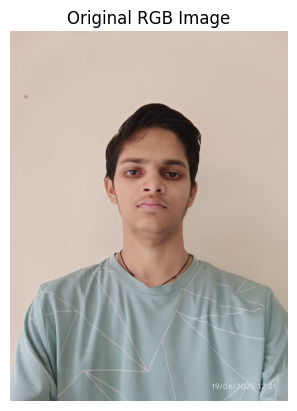

RGB Shape: (1152, 864, 3)


In [16]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# paste base64 string
base64_image = """
/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAYGBgYHBgcICAcKCwoLCg8ODAwODxYQERAREBYiFRkVFRkVIh4kHhweJB42KiYmKjY+NDI0PkxERExfWl98fKcBBgYGBgcGBwgIBwoLCgsKDw4MDA4PFhAREBEQFiIVGRUVGRUiHiQeHB4kHjYqJiYqNj40MjQ+TERETF9aX3x8p//CABEIBIADYAMBIgACEQEDEQH/xAAvAAEAAwEBAQAAAAAAAAAAAAAAAQIDBAUGAQEBAQEAAAAAAAAAAAAAAAAAAQID/9oADAMBAAIQAxAAAAL1hjcgAAAkAAAAACJEJEAAASAAAAAAAAAEJACJESAAAAAAAAAAAAAAACCAAAAAAIAAJoAAAkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCQAAARIARIETAACJEAAAAARIgCSgAJAAAAAAAAAAAAAAAAAAAAAAAAAIJAIJQJQJIEwJQEwEwJQJQJQiUAACUCQAImAAAAACEwSKCCVAAAAAAAAAAIkAQkQkESAAAAAAAAAImACYmAAAAAAAAIAAAAAAAAAAAAAAARIASAAUAAAAAAAAAAAARJEgAAAAAAAAAAAAAQJgAAAgAAAAAAAAAAAAAAAAAASAAABQBAkgTAlAJAAAgkBAkAAAAAAAAAAAAAAABAAACAAAAAAAAAAAAAAAAAAExIAAAAIAEwAAoSBAUAAiQAAAAAAAAAAAAAAABCYAAAgAAAAAAAAAAAAAAAAACQAAAIAAAAAKAlAlEgAAAAAAAAAAAAAAAAACAJgAACAAAAABBKAAAABKJAAAAAAJAAABAAAAAACVQkRIQkAAAAAAAAAAAAAAAAAIkAIAAAIAAAARMAAAAAAAEokAAAAkAEAAAAAAEkSUAAAAAAAAAAAAAAAAAAAAAIJiYAAAgAAABAAAAAAAAAAAJgSABMSCCYAAAAASBQAAAAAAAAAAAAAAAAAAAAAACAAACAAAAEAAAAAAAAAAAAABYCJEJEAAAmATEgUAAAAAAJISIAAAAAAAAAAAAABAAAAAgAACEwAAAAAAAAAAAAAAWgJRIpfnN3N0FgECUTQAAAAAAAkAEAAAAAAAAAAAAACJgAACAAACBMAAAAAAAAAAAAAAABMggJQK3AAiQKAAAAAAAEFgAECUCYAAAAAAASQkQkQBEiAAABAEAAAAAAAAAAAAAAAAAAkAACYkCgAAAAAEgBAAEwJQJgAAAAAABIc/wA8fQef8/VPV5uJXfXhlPT7fny/a7fEe3L7kRYhMAQAgAAAAAAAAAAAAAAAAAAJJIATASAoAAASQmBMSAIkQAAAAAAAAAASPPfLlsldZEkTMEJglEiYHZ63zqX7i/xPsy+4iYRMAAAAAAAAAAAAAAAAAAAEgE0AAAAASAAAAAESITAAAJISIAAAkHn8fikUV1mKriUBWRZAiYAQQWmhe36j4zpzfsY5OyWAAAAAAAAAAAAAAAAAAASATQAAAAEokAAAAAAEAAEgAhMACQeDHlkZWpqRnaEmwRVchFiCSsxBdQXVJKBKBf6D520v3EeL7edQQSAgSAAAAAAAAAAAAAACSaAAAAAJgTEiJEJgkAAACJEJEJAACJgSDyPR+WMZrFmaaWTWdCItaXOu9jC+t1wr1RHLbWllItVKxMUQSYSRKDX6j5Laa+2jh7s2EwAASiQgSAAAAAAAAAAACZKAAAATAATEgAAAAAAAAACATEFkUPH8fr4Ca2pqRW1hpa+dV0vfO6XvpLnPQOdsOfPqg5Mu+LPLz9Tl1jjjSmsQEmATEmv1vx3qZ19LEpYAABKBKBJBKJAAAAAAAABBcUAAAmJESIBKASIkAAAAAAAABAliU8fj5ysRNk0sI1tpNR0Z653bStc6t0NCqwpXSpmtJSLwZ570Tz+X0uLpz5mlNYgImJNd+Xsmvp9eTrzYAAAAAmJImJAAAAAAAAESLCgAAEwJAAAAAAAAAAAABEhHzHd4Jalq2SnQi+m2d46a6TWd9b51jvpJWZgIkitqkJkpF6lK3oY8vbhc8GXXzdOWaYuUxJb1fJ9ma9nfHbNgAAAAAAEgAAAAAAAAsKAAAEgglAAkAAAAAAAAADLbxo8TK+WotGhOldprfpr046Z30S1mwrIREwQkREishWLQUprmUy1rZy83dzaxxxem+cTBL9fH0y/YRMZ0AAAAAABKBIAAAAAAALCgAAJAiYAEwJAAAAAAAAABPy/1HyBhnfOy+lLF+vD0s712m2NwsKxeCsXhaReCkXgrMylIsKxaClNaGNdKGfP1YWcGW+PTlEWWPR833JfeiYlCAAAAAAABIiQAAAAABYUAABIAAESAAAAAAAAAAJ+R+u+WOAalkXjv9bm68dZiMJehywnVHLC9jlk6IzklEwmAiaita1ekQKzCZ57VPN5+7i3zrejWY9zw/el9tEygBAAAAAACYkAAAAAAAsKAAEgAAAAAAAAAAAAAE+D73zZ5lbZ6zfpw7pr1ovjz6YY+hrXk4+3nZ4s+hiZdEaQvNlaQlqpQ057cyMaY6zrPOs6p5LS9+/mdcs+Z7Hl2c43zn3PE+ll9ASpgSiQAAAIAAAAASAAAAFhQkhMCQAAAAAAAAAJEJEAAAn5r6X588iktZt7HjfR5302tnjauVV1yrgaV4sl9TXyexO/TDoSMtsl5cN+SGeOWpvGOlmulLy2pcY06ZRx9WCedMT05z9n8d9nmpgsoEokTAlCJQJAAAAAmJAAAAALCkgiQAAAAAAAAmBIAAETAABPjez4J4WmemsvqvnvpMdIw0wzvHKOiuDm9zxunPl6cfQzefq5t89Ozs4+zK2euVnPw9/KeVF6aze1bWa6edU9COPeXo15by9fNvRPGmLdOXX9V4ntZsolQAEwiUCUSASiQAAAABMCQAIkWkoAAAAAAAAAASAAAQkQmAC3yP0fJL4NPW8vT0Pa8/wBHGsst4zrz6ehlby06c65I6pMOjfpjPeCM75rlz9GEcPN6OOs8u+UVjXpXOmaFz6Y3zZu0jwJa9eP03TE50BKJAAgACUSASgSAAAABIACDQUAAAAAAAAABIAAAIBMABx8Xq+Rjr3+d6XJZPdw98VSKV0quVdhjraQVJjLRbU0qY4bYmEWqim8nPHRBz23suVtCUmSeDop05/VbeT62aFgCYkCAAAJQJAmBIAAAAAANBQAAAAAAAAAEgAAAgAAFPI9ry8denm05lt6Pm+kyiRETCwmBCBIsz4sWe5GOpzc2/mHZPL2mOmWsStJRepBAITyc57NTo9jyfWgNYAkAQAAAmBKJAEwJRIAAABMBoKAAAAAAAAAAlEgAAEJgAAcvVSXg4/Qpjtn3cPVc6xJIAiarEBMC8de3OtHPWTHyfVxrH0OKxrtlpGk1kmEEQhFL4HF08/Svb6GO2uYWCQIAAAAAEgAACYkAAAA0FAAAAAAAAAASAAAQAAAEScc9PLjppjNF6SEkFYmqpUFFZa11k853ZW4ZdOSZa0JvbPSVNYNIgiEWTy9OBh1V6l9Eb5ASAIAAAAAAlEgAAEokAAA0FAAAAAAAAAJgSiQABEwAAACCefdLz8vfjndlbBMEVtRaVUN6ZZV0X5YuunHOi3ypknRGHRM56xEaRS5ZWSYQlcWhf0uL07A1hIBAAAAAAAEoEokAATEgAAGgoAAAAAAAAACQAAQAAABAACTi1zvjpJApei5cHpDk6dYtil1YV2yWmO2Zzc3fSZ5O7G5aYmJQSYVObv5fcuaalyFSAIAAAAAAAAAlAkACYkAA0FAAAAAAAAAASiQAQAAAIAAADCN+bOrRMTStoITCxW1SmeuKxnahNqWSK2FK6VK2qLIJOG2J3ehh0a5gBSYmAAAAAAAAAAAEwJABKJANBQAAAAAAAAAEgEAAAACJgAAAYb5S5qs7lEEolUXGee1Zca7VOeNMyIVQqpCEmYDo5vTud7FyAAmBKBKBKAAmBKBKBKBIAAAJRIAmBKBqKAAAAAAAAAAAAAAAAQAAACl6RjS9c9KlDS+WpKaClqrWJGWO+BSqBWapMVVZW5f1PL9Zm6FzIAAAAAAAAAAAEwJRIABKJAANRQAAAAAAAAAAAAAAAgAAARME1kYVmMdKZ6ZDTCxvGdTStINGYY3yWtGdlqwSUC0xcv63k+sl4LlMCUCUCUCUAACUCUCUCUSAAAJgSABMCQaigAAAAAAAAAAAAAAETAAAiYAExJyk46Uy3ouE6VEJIreEzppVcsd8UyjWlViapMxcm8Wlt6vlepc3TFyAAAAAQJQJQJAAAmBKBIAJRIAABsKAAAAAAAAAEEgAAAARMAABEkATEnMMdESXONKmcXgzrtUxrpiVpaiVpNKJuV0WhMlel5voM9EGsAAECUAAAAACUCUSAAASACUSAAbCgAAAAAAAAESAAAAAETAAiREhAExJzDHQACldaFYtVc8N8DGt6mTUlbWsRNi0TA7ePqZ7BrAEAAAAAIEokAAATAkAEokAATAlA3FAAAAAAAAAAAAAAAImAABEiEhEeZL12rOdgEgSUrpBz5dOa89N80zi8Cyy1i0EVtBG2UJ6zDfXOAAAAAQmAACQAAAJiQBMCUSAAAbigAACRCYAAAAAAAAABBMAAJITCcnNfW3itbnx09K1bRMSESExJNbQZ00oZ56ZmdZkmwsVtBVIpW9Etvzclnv2+Z93WOkQIAAAAAEwJAABKJAAExIAABuKTAEgCJAEJEAAAAAAAARIhIiVUtjyWs0359bK83Vzrjy3cu/o2w3RMCQEC0QIpahnnrQzmxUTArNSYmCtL0RyaEt1cnbrPVrwLjuc2i6q2lAAAAAlAkACYkAATAkAAG4oBMSAAAAQAAAAAAAmEM8jppwYWehzMLHfzdNmelKGysnBPZ5uOser5fTnfWRFkWIi1QrJFZgrTShVYtaWpCIVaJgplpwJHZS1k7m+NkxYmaLOuVo67cXRNaoSyiQAAACUCQJiQABMCQAbigEgAAABCYAAACRE1wTpy5lmuNuey+WUpXqjQty9fOX6OTtrGuwwvNC+diefz+vw469tvG9PPTe+N4vS1CJzkuqEWgit6GdLVliYsTW2NnMr0WV6E75RZNyvWRS0lZvUpKDTbltL1zyXmuic7yygSiQABMSASAABMSCDoFJgSAAAACEwEiEkMsK6OfOtzM1slonGnPasLt605tMjqw6OVNejn6DHbn2K11oVRYWravM4voeLO524url22ipaIiNZpayZiSKXoZ00rLWXLZty17bM95jXOJmdYRNhUIlYiUEVtUiYJclYtVGunMXsct5roZ3lkAEgTAkAAAHQKAkAAAAIZ0rfPGlmuVckvnQmmlNLKzNSMNcVExpvnNnOy1O/j7eM3vEVhtjrG2WudViNIiE0vnJPP02zrknTLn1iJjO7XzvZcFa3qVzxwIp23sx2hvjNom5kWptSILUmYREyZxasVBe1b1SL1lAkC9bS6acqXrYay2mCyABMCSCUSdAoCQAACiUxRrMzC5iqhXJWWdItZfSl6rWKxfDp5ytq6S9HN08NlejDpOrHWhat8qy1y1jel4rl2w1jStlUrpUa5WLxMRyZ9/LjrW1JzvZjS524t9NZy2mLmMr0uYlYTAm9dFil6pFq2LUvmWkK1tWK2pBrpnrVK7UlzKlpaCgCSF4hpkXptyWl6WOsshQAOkUAmJAAJw1x1jKdK6zSlrGWWuEZomXW8XslEVnSax15axXLvj0SuHq5Uv04bnTnrSr8u2cuW2O6a2rNcV6THSUq4KTMF2YvEwmddKmUaVlpYJmorS1UlNlm1C653sVptildKakZaUNItBSJkyrapfXHYmt4K5aRLaLCl0FlCSCEiArXKI7FbZ2JUQdQoCUSAJglcr57xbl6vPSeri7qrzdXJGMzEu+mOtkVtQzrMR07c/TpzX0wjHKZL747nTS+dlKzjLPRnoXtW9cVb5x24641pphuUrfMsrcqvBnGkJSLClbxGcaVWtokXWKIE2ixammBfWlzBNxTo5yt89TnraqTvjqXSIpsXnWrCZgTE0SITEKWoaZa4nVtydGd3E0B1CgJRIBOdbaxXPSNZp5/bwRPbw9VdHH3cicumbOtdc9qpTTJM0TG3Vx9ek8fbwRlaty+2Wx0Za5WZY6Zy9N89yulLVzYdHNHbneKx6uLqL56UMr0g3nLQU0xLs5S1LVK1tERddYi+JBJe1bGmHRlYmamG2O8TlrzG1s915K6USdK2Na2pVtMdSuXRlGOlIl1q0qs3qRCpFL5muGuJtfO0vTbDbG5QXrFAJgSnjuZ3x13zIk5eHr44nXK56PPpFcCYzb6461rnORlaYjTr4+zS3n+h50U0ppGmueupth0cplSYl6b52roi1DHm6ueOi1Na4tsbx1Qmsaa5kaZWjasWrGL1iUWIm02RM1K5zEtb1uWlNaVsSuWuBTpw6CnL08sb6VvXPMItOllZ75mW1NEtTSK56bZxEwW1qi1q1GW2Qx1xTaazLptzaTXQic66xaAmJHmdNN89b8/RcrRBw83RzxGmeht1cvZb51NaZRpFyc751TXLSV14dFjz/Q88jTPQ11y3svydXEURMu2mWtm6JXHLWkOnl664IvlHZfHayuetFyETfOS1bKi8WRMBS+ZGWsy53iS1q3ssCvPvgW6Mtjm5t8Y67JrnprnGkrVbPWhltntGmmelsZWxilZkaUqa0iBlfMZaZprMTKtA06OPTOvTDYCYhPN34vS3yw6eferEHLydvBLbTGTXr4uuzny6OeWbVRek1qu2O0O3i7ajz+3kKa53Nerm6rM+Lq5IratjXXHc1rNanLSsufXzdNnJz9XLG/RydVWpeDGulJYmJJtW1kzEgEQhcZqjotnJeWtZtYTmy6KyztKzlxthHp2w0qnPrSLaxNTjfMaY7E3pYvTShlXapmvEVWGGe/OTnehtMSsxaCsxGb7InQBlty3Pmer5Hr7543w3XWEJn5/pebE10yNOnk6Ktz9XLEBZhBNoRr18vVqYc+3PE3Su3Tlezm5t8ITEmm+G5el6VGuOq03z0Tn5Ozji/TydJtCazppQrKVSJaAmAY7YS1JS22OhqtNVRQTjobxaTh5e/gju25+msctsi963KVtBntjqXTBpCSkWgiLQVlBnzdPLCEmlgmJhaxMR7Iz1Anl6uXWPL9TyPTuK025a9CMdynn9/EWw3yim/PodvH28RECixFqaG2+WlnPhpnE9HPuvZnrnZxZ3ziZixfbHYvWa1F6XNZrdceLt45I359l6ZpeyM9KFEySixAFqyuWdqyRMWLaU0q2lJLYa1MNs9S4Obn6OOO7o4fQrHLrxKzMFSTK9YOmEk2rYomCIkRW0GPN0c8V0y2LzEk1tQK6y+oM9QJ59qb5+F28lmfU4e7jq3X53aW5unExy1xiItketw9/AVglXipOlNK6LRFnNS1Yt08/Ya8+/LVMWkudkJfbHU0rMVF6aF9KXMOTr5Yz1y0Oi+elK3gzTBIBBemmK5xNZJmLF71vVkwVrahpbLqKRapz8Xbxpp3cHaupBaK1JqsZ59NSumdy0xJETBAIBz8/RzRXfHYtMWJy0yJ3x2l9IZ6xKLKynfPxuP1vHk9mvN21wb5Znp53g5efp5YtnYepw93CUhMtqzBfTPWuil87OaJRfu5Oyq8vRymSJjWKXVrA0hFk3poaEFePt5JcdM9E20z0qQRW0EAWrdaUmEziYibVsX0pepBStoJ0pc2ymxy8fbxo6+ToOtErWLVKVvQsrJbXG5tOVhS8mU3GcawcfL28EX1zuX0poZ5zYm0F9UY6s9M9YtMTrOXi+550ef6vi+hZpy9/HHTv5vo1jx93HGasHscXZxmdq2lrMWLbZbVtlrhZhat5ejox1sy5Onlitq2ANN+fRbxrSo0z0TSLVM8tc5eW9bJtplrVgQmCq1S0i51tVM4tEL0uXvS1WIKpgtatyYmCnF1cxntjondbPQiJhaUvUraJLWrYtaskRapABBj53oedG21egmts6prW0TW2a+uTjrGG3PvnvMLHJ286eHT0PKj2csuiuD0OWh6HJ04HJS+Ue3ydXKUi1JZtS5ffDorTn6OazLSm0dFkVhzb88JiSQW0zuul81azTcml6JTHbApW9JddsN7LAmAiYuZzWy0raqUi0QvS9XmJLEEEk2iSYmpny9XMmOqDq25ukRMLSt6ETElrVsTathAREiIkc3D2eed+3N0E560LRIjG+UvuDHXPn35unLpml0tWS8Xle5wx5Xp+b0HRxehzG1uDts5MOjmj3ObpxMaTEs3pc06Ofpsnn6Oaq9GHTGtLY1jjplFprcEF7Usuk1tZbXLU2y0qZYb4mN6aStsdbNESSgStmVlUtTXIrFqkWrYvatiQJiSbVsREwZ83TzpjvhY36efdbQFaaUKyFrVsWmthEwIkREwcfH1ccdm3PuaQUTnGcRaX2hnpjzdHN05b7c25aswrl6IjxuH2vLOrXzeyOPt54rTk7ONPdy151xiYi16XNOnn6LI5+jGm+ehbDTIxztWJvWwiYJvSxe1Ll9cta0hQnn2iXkTRN70suk1tYLjOYIi0Fs75kRIpaJLzElkSSiS0wETBnz74JlKDTs4912XoRS9SqJLXpYsiSYmACK3ocGdqx1aTNVLEc+mMWWrL7UxOenPy9fL05T0cu5tWYK1tRY8/vyjwujTkjs4uvkrt4uvlT3ObfCsomM216XNejDfUZbZi0QMr5mMTEWtWxETBNq2L3pcvrlrV6XoVy1yGFrS16ebctas2WvFSIBW1SazJnEwRMSWtWSyJJmJLIkQgpz74JnE1NNsNTrtlotI0zKJC9LFpCUSImBS+Z5kTvJrpW1srZGNCN89c5fZDePL18uuee2Gp0TncrW1VrnpQw8708M3kpOyYUpez1s01iM21q3NtsdtRS9CoWMt8YxWkiyxSNKxW65F16bZ7WK3oVz0zMqaZxrpz7rtXWtTS1UhMERIiYkzraomJLAtMSTMSTMBE1KYdGCZ0vUnTPQ6b5a1M1S5tcxatiZiSQARlrieZ28PopfSZXPk6OOF66mue0HohrPn6ee5wWodF8Ni1L1WlLVMqXyjmy7uGMStelfDYzEXtW9ba56WK2qs6cu0rm6eYzmhNLURaIqaTnatL52Nt+bezSKQWzihOTOXXXm0OjTmtVwiJFUisxUrN6ETAsiS01sWRJMwFZgrhviZ0vVJvSxtvz7kxKq2isszaBMSTMSIkV5+jkTk9WREVLz886ROl7EJg75hbXHXNMctshthobIFc9slyy0zisJjz+fv889Hfn6Ckha9b1trnpZGcwUmIW+EzLWtdpKNcysWrZM1sXvS5rthtUxNajO9Yzy1zhely96Wq8xIIEBWtoL56UKpgWrYtMSSCZiSImpGOuRnW0ItWxpvz7GoqsXrEWrK6VXKykhIpw93mJ335ekji3GXbpM1lTXIiEp3Qi2tL0M89aGUzU2vy72Xpesc2emObWs5mvl+pxmnTydZWYktpTY1jO+orapWtqxSlqrerWKa4yWy0sY2RZpelzTbLaoi1arW1IpnrmRatovelq0mthEwImCsTBati0iYRasl5iSZiRMSRFqlMtsTON5k57dGQ1b21mbpnE3MmsLTTQsU0lMo0zKeP7nhnV1NzDpWM181ZXoVtEnZE1K1mpWl6FayIvSTaKynNjfLNZaZG2dqmfVz9BWWpatZXS+dtZtE1K1tWKVvUi9ZXWk3lxia3Ol8LS3vZV9sdrFbVqtbVimelCtqzGk1tV7VsTCSImCsTBNq2XIImJLzEiQmayImCuWuRXTJJ2ZYlvvy9Nb6cm5MVkmzEttSFsiE259aGfge15x69r0ExBalNTKtqqIO2lqlK2oKWqViYKyqXpTKIpNYY7cydNYhZ6MOwilZWbVlL2par1mtkQRSJgTFhekrbLSDO1bJffDQ6LZ71Stq2ViYlzpepWQtaljS1LEzE1EWgpExE2pYzWqTMSTatiQSKRMRXPTMzraEiYmLXpetb59BKKrESS9L0WbVsSVMcb9RbJUmtZRvlo1nWYEIO2k1IpahFLZk0rmaZ0jNmiCYgjm6MBfCbOzTn3lkFpiC9stKvCEggiswTMSJiStqwWi8E6Z6VrtjrZbPSFyi1YzrehAJtSxpatiZhUxMFa3rETWS1NMiZiSb0skipRIiYiud6GcTBEpJvXZdJxuXmJsi0WloiUmYkmJqvP18nSUWlKNFuU3pGS0LEh//EAAL/2gAMAwEAAgADAAAAIfQQdfQAAHPPHMPPPIBDDDDDDDDPDHLDAAAAAAAAAAAAAAHvvrjggv7+QRfcQBPPPPPOABAAAAAAAIAAAAAAAAAAAABAAAAIAICggkvvvqgk/wCEX0EBTzzzxCAAAAAAAAAAAAAAAAAQAQwwSwyywww47744IJb77qIPcX/EFTzyAAAAABADDAgAAAAAAAABTxTzzzzzzT777777777777764pP+MMADAAAAAAAAAAAiAAAAAAAAAAAAAAxzzz77777LLb777777776oLoIIIAAwSwzAAAQAwAAAAAAAAAAAAAAAAzzz7rLIIIIIIIILL77776qoIIIIb677zgIAABAAAAAAAAAAAAAAAADTzzr4IIIIIIIIIIIIIJL64IIIJ77767zwwgAAAAAAAAAABDwAAAABzTzz764IIIY77774oIIIJboIIIL777777DCDAAAQwzxzzzzzjQgAABABzyx6oIIJb7777774oIIIIIL777777qAAAADzzzzzzzzzyiAAgAAARTzz76IIJ777777777764IKoZ77777oAAAAxzzzzzzzzzyABDCAAAABzzz7qIIJ7777777777/8A/wDwksvvvnqgAAHPPPOMPPPPPPLCAAAAAAPPPPOoggtvvvvvvvvnvvvv/ninxwjiAAPPPPPOABPPPPPPPOAAAAAFPPOoggjnvvvvvvvvvssktvvonjggigBHPPPPPLAADDHPPPPABCMMDGPPIAgvvvvvvvvvvvvggggksvvvqgABHPPPIAPPLDHPPPPIAHFP2C1MGJAgnvvvvuuvuvvvvjjggksuvtsgAFPONKAEPPPPPPPPKAOJJMopiktKL1sssggggkstussghjgggvuAABPPMAAAAAENPPOMPPPJLIfiippgx1s9ywgggggggggmsvuogggvuAAHPPCAAAAAABPPAANPJJBGsklqOno6zzXzwjgggggggggsrkggguAAAPPNKENAAAAEMMAAFJJCuTSu2Y763u/wyB9//wAo4IIIJJYLqoIIKAABTyzygAAAAAAAAAByyh5yAY5bGlrzwgN+t/v/AP8AzjhigggggggghgAFPKEPDMAAAAAAAAABHGQn9bbrDBOABjIE3xg8/wD/AP8AqqggggggggkgIHPLAAAAEAAAAAAPKNDOjc0Z9YPDHJPJhSy7Q/8A/wD/AP8A74IIIIIIIIIDzzzgQzwAAAAAQxzzyO3IkK4ihzgzyjRiXA8v+Nf/AP8A/wD44IIIIIIIIDzzwBTywQgBDTzzzzzg4NctNEDTSlkvP5qra5UPf/8A/wD/AL7pIIIIIIJzzzwAABBCAATzzzzzz4RMRDnTTyaZKxSGmewjgAINv7776oIIIIIILzzzgAAABDTzzzzzzzzpmUea1IeWjEMPgK0jRzSwgABCL77776IIIILzjSAAAABTzzzDDDzzzqVXLoMpetA861vBvuCOQxiQ44IL776oIIIILyBAAAADwzzywAABTzzS3kH+wteIWn7Oq6wRS0jDy45rYoLb7764IJKAAABzzzzzzzgAADDTwejG/UH0O0R6GoNSopHjQgALL4rY5Lb776IIYAARzzzzyzzwAAADxzye0o+02tM1NhUEfhCzj3zygILb47K4LL77774ADTzzzzzzzwAAACzzw71fM47uLcICAnFWSTpbzwAIILa4pK4oL7754ABzzzzzzzzwgAADTyiXnlPva84S/DW3XkWJ9XzgIYIIL7oL76oL774TzzzzzzzzzwAAATzwBiEj+O2nbsnWXrbIFKhTwAJKoK774oLb4pLb5TzzzzzzzzywgABTzwAQrZ7WC7/co3vrlwmZhyAIIIJZ7744oLKoJLJTzzzzzzzzzwAADzygBwChaVwGp/cVeSR2vufwAIIJLIpLL744L6oILzzzzzzzzzzwgATzCBzwBCvXESBRKckEzVLsbyoIIIIIIIJLL65L4oJzzzzzzzzzzwATygABTwACS20TFppc8h/MWIL6444764444IIDQrK47zzzzzzzzzzzzzzwABygAAe7UmdIAFH9zhk4ILLLIIJLLLLawhDwpLJzzzzzzzzzzzzzzygTwABQh3/+VvMYHM9Gl64444774444oJDywLa4LTzzDzyzjzzzzzzwBSgBTyinQTznp8bd1Unb77rLIwwxDDCwxDQoL74AQzzzygBTzzzzygBAAAjygUgCQAb/AMw9QSe6CKO8wxx8MIQ08Q8KCyQ8888ssAA08888oAUoQg8oVBFRUp2/Vws36C+K4AAMIQw8sA0IQ8uOU88888888Y0888oAU8AQ8GltxGrEdF88chL++iAA099AAU8oQsIA08c888w0888888EAAEc8Ifc45RZySWCJkQg14YCE88888sAA8IE8oAQ80s4AQAw888884QAQwrHKUqBpBM+CTwYUQRXajx6wQ088MAUoA0sAw8U8oAAAA88888wMH+GgZ2uUY59xpvFwSMAek7JoigMIAwwwMwoQ8sAAU8gAAAA0888wmCQL7/SSCXX419lNlRKeZRZWFpVoa8qMIAQo0A08oEUsAAAAA0w7cVn49c8NfH7bxpXgWFphC3Rm2Giquo/5jF0OA0UsAw08U8AAAAPcwCeHr8VPNvl3ITY1M5itD9PybnoichRvDBwUQqGLsQ8sEIU8AAAb6L/a1orNGSEPxz8nkwk/81NkOaAlQZnB1PvrOSSA0zhlPA88A8oAcBFJb839ZEs0iwSjkvMMAM1NiGu3c8cJ+Va4ACSa86HHjYn/AOBANCAL9hmM1D935M2Mpa7+GlIDMJLWWwjhxbx5xcijb6ym67AQz+70NAHCFDuFsEdPL/3NwHk+s5DoCBLCBBVe4psXkcY8zkYxdb7tTRLFALjAFLBSQ111d2ZayJlidXFAIoEhPKoPtnZekkASZU1betr9WRFNWPTgswFLEG0w48J47Sr4jIZVKRKgJnfCrtKTdaRqXSaOhMvOezNrfikK/v5wAOi3wuvPZJlL2rJJ1/W+XqV+eYrnfeeAl7ISqT6e9cUSRAV75SREJgAJvaC5z6K0BN2ezJ+1Q8SAby+bcFXSck20Tcfe+LOIBFGJEKB7pXHbDAcwU3Wwi3NINS2HZWV7QeFyCHcWSRK2wcWdKuhXeeDEAJAEM7gzTfPCB5Sgewq2p/FZ41fJf3OaczecTVbYJ11dKKQneFgUSdPEKCLtgyTwICf00Of+s/lnAcaaXRZjWT+qcfGaVCaz9ONFrnYSpvLOASbaYqC2XDOboud1uvk8ktNYDs6VcQIY9sefJNQSc6zJomquJQwuMAhtvDNkiLiOoBqQVcJPh4inBQch1SaFPP6dKSCKZBWyVBqthkYe5puDqimujMHBBBqN7MjCNct8vn5Wxh0ZVEfv1aNXDOdXZfaPiqvuSaPsoPilsivosPzlyS2J4N+Pjghh3TWXYYZf/hqhTmPfEhSaVCDhsiZdNmmImlrtplPEwg8Z6VNdiFxVvsVdedWaVQwllGHjAXkscaBHvmjnTBSpqroilqh+CTHkEey3PGgw2SmjurMsKJqoqNgI1QP9vlcXHMqrtsWOXYogrlruqTHiO9aUW0GHawHvmNnA2ZJ5nNiS3fAINkuhRQHHmpnkEBa+dh1imqw0MgiwQzd/8HbfvpsF6TPO09WUzpGk65hhiuMYYElurimARwZ2ntuv60WvkxpmoLRR+higrxd0yM705Q8sBsX4AkgvsAQJgqptt33Oy5jKdljLVOBAotimm6kmatYtYd4dChZtCgDlbnMmkllNTApjuht5pDinaJeytVaZHGvlhiM1ox6yK1ve6eeAKJw3YnFCDiELm1SIvlIgkewW4k9oltqu/HBHw01Wmjzj1150i5yVaVQVEcItPCIpAEjp6j/WYyScTLsdi07iv8NQBP/EAAL/2gAMAwEAAgADAAAAEFQRSXBTfZTScaTXfZSAEMMMMEIMAEIMPPPPCNGMOMfBDTT7w08zy7g+ReRMFeQQdceZfebfTdPPOHPOMMMMMIMIMMBAAQQYQYSwy0//AM9f9o+HkEB2kEEEG13HHHHEEAAAAAAAAAAQAQwwS0220008/wD/ADww1/8A89+rZlbDSkEF333X0FEHHEkEAAAAAAABTxTzz33333PtPfv/AP3/AP8A/wD/AI092holnfTfScYQQQQQQSYQQAAIABDDAAAADXfbcwwwwzzyww84084ww1/+x/8A/EE0W03EEEUE0EEAAQzzzzzzziAAE330Mc8//wD/AP8A/wD/APzwwwww1616ywx/7/8A3kMEEFEE0ABzzzzzyzwAAAHX328P/wD/AK0wwwww0/8A/wDvDTDTjDf/AP8A/sX00kEFW0wzzzzzywDzywwBzX32sNP/ALjHP/8A/wD8sMPf+scMMMP/APr/AP8A/HGHE33jDASAAAAAQjTziBEF33mNf+8Nf/v/AD73/LDDz3DD/wD/AP8A/wD+4QRXfQQDADPLDIAFHPNPKABVffYw3/63/wD+MMOMMPf+8MOsd/8A/wD/ANsEEE3GXzzzzzzzyBzywxzzygB320Md+sN//wDLDDDDDDS+++DTz7//AH6wTfYRffOMPPPAAAENPNPOIAPeQQR3+49//wDv8MMMOMMMML98vZ4M8kFUEFXjzgATzzyAAAATzzwABT0Ed/8AjPf73T//AAwwwzz7yww43zwwywWYSTXPPPAADDHLCAAPOODALEMQXew/+4044w08www//wD/APvP/wD/AOsFHmFX3yADzywxzziABzyiB7qHGZ1muN+MMMMccMcMMMPPP/8AvP7/AN81fafedKAEPPPPPPPAFPHFl4BFBPDsJk7zz/8A/wD/ALzyxzz/APvP/wD/AP8AkFHkFXAAAK4JDTxzjDwgATOTaAARhvPw5DrPPPPPPP8A/wD5zwx3/wDvv/kHGFXwgAIIIIITzwADQwAcBzEzmv1h9dVvgYM8MPMNf/8A/wDz07/7y+QQdRXdKEtgjqgksMAAFINZ/qiUYH7Q/P24zldvsizww8/76/x1/wDsOEE0l2zyiIb774IIIIJyhSBzjKjaQFRyZ/d9nbvL7488cvPv/wD/AP8A+McE2kWhDwzL77774476IJymCiJtZOk0nGfWa+P2k8MJ7+usMPfvfs8NNxyDywAAAK777r774JaYVl+Uc6pGkU10d9+FcokMNKLL/wDDDDDXDDDD8AA84EM8W++++6yiCCKOlb98Jtpx9l1HBvv5FWeqCCS+/PDDDX//AP6/gBPAFPLGtvriggggij5xu9pe7rgo30V75jGBIPigggkt/wDtMNf/AP8A+4rnvgggkrnvuggmtgnrNFuSE/hTW34yNabqu5iff/pgw9+6www1/wDesZ77pIIJa4oIoJL7774T6akmoCeUcQuTtqTJOPkFnHW18MPf/wDjDz37+62meWCWqCW++yy+u+Qnij5iS3VJ78WQboLaGo9tpDf3/DT3rDDDDj+iSW+++CyCOuCCCW++O9yc1xaYnqniV6wGbPT4MxjPrbb/ACw//wC9MNOI776IIIII77oLb7Lb4VgOuO4+BEEr1kay7rHxAjT89dtt+csf/wDjDHC26iCCCCSC+CG+6ye+zjn5qDkgAefMepOJb0EAUo3fLzffnTPDT/8A/wBb4oIIIIIL74JbK55LIHZdK7dw9RU812mUktAADwxv/wDLHLvvLzDz3fW+iCCCCCC++KCCC2KW6bTS/OlbxjXzBZMhEWAc4W7/AP8A8NtcPev8Nf8A6CCCCCCG+++CCCG+CqKTtghigWT4BCIMv2y3M8ASvX/TDfL3L3bvLLqCCW+qCC++uKCCW+KqGBy1zRITpoEom48Snd8gW/8A/wCuMPc8vc+NO8+oIJL6IJ4474IIL5JYJr6Iy/KrZ/sKmov8hZAQT7/+8/e8/f01FGvf4JY574IL4774oIbq5p4r75X+fIHJGH5SLe63rTr7/PPPPPe81GWVc7KLL774Jb7774Ib5b45YL6q96OswpewuuH6fL5K448PO8888FHd9k+c4KLL764LYIYLb7oL6p5Z4Kd3bdWyL0zEgDI9LM88/PO8833mMufdmc6IIIb74IIII56IIJYar6JZ0ICX9Gm03EFFZ+8/+8nHEE01nG/O/VmcIoII6YJIYIJ776IL5ZbpbK4FTpiehfis8r3fvOc0n/8A/jP/AIz422fU/vusglglvqktvuglqhuoivthAKDNrX00Z8K2x8xTc7xjsz252/592cxxggogkkvviktoglvlhkoolkKVX1iANX0PPZ4/5Z+4zy7z07132505TQggogngggpiggglolgvktiwHRiQOuU5BHPMf83cw97vg/69/wC8MvMvPb777Lb4oIIILr7oZoLLXiVVqJEJGl9ygg1ITGf/ALz/AP71/wAMvlesc8Nq7oJILKoIIIIa6pKYXzKtQKY48hWCDRwDVdQvU0+8sPc8Ouv0m9c8Or6oIIIL6oKII6LXuNcTURbPbrppxvwIzzafxLCiI/vc899dem1e9f8A6+iCOCC2iCCG3279WiwR81udq+pP3p6mn+hE7LlnVmkHbzjjdVLXrHquCC+uK2iRoxiPj0hvbvaugYgYfrLJeYui2RZktvrwDXWMDbBlRN/zqeCe++NlUUXxZoWOZZMyVOFgPPn5I1149HwjYX5RKrXR3I5RBlxl26q+Ce+6K3m8FxiH9tLLkK2SY5pij0DcdcadYGEXLHuxmoADCOcPd2C++Gu+iaBpNCIIx1I71KYsuYmgl0ikKZ9R/o9SRWFXUGxKP4vj9iz9amWKK+FYHosvui3vxROLkGS5aGQIG+irs8MRIYYGNUfHXMcuJ82uBQuKWiKudeoYRO2oSEsFqZhCqNI8+keqZFnSyCqBR/z5H2dspHcGPpQxDGW6mjntNxHIiK2Y5jjnWA38k8SseY661FN00vVsGgvWybcvW70RGdQFSqCdYP8ATQDz29BgTTgbnWlkGOwGjsIR0b0HdsM22XXZa9Z9pSdnHpSzvi9mY3JunCzQ054DG802s4+zW6uud95HPUA/sTaQWfUfp4Brp5nPTvvpWOJJtFacaRj0afEW8/qJ/wBv72g1tMppMe43N4dGuF1cf+ucC2eKlLJ1f7ADg5dCGmd3r+fdP7x5UIN7EvszKIiJeP3u2nJGl8MMMszn1uaoZs573qD7/o6C5lvKE2P95MvFZIvseS4r5bP3V3bHc11d+oaom3H/AGOly+wl2O72avC+TmcLkByacqbKrCXu9GCn+6od5/CAyeDeauO/XKCuyb5W8WR7eOV+yImX6nfi0uwKHyXvmg++ObkkYWIUDoym8gEO3nBd/KITgnygJFyWBWOQ/D43XWUUAMD87PPhumoHoaG2zlda0CwyO8Y44R5iQE9rQbqQD/OKDQnt4bLOUhh4hUrDLm1s0/8ALDph7UjkEsGgmpAqwS4jchWloBTqxoix7tmqp242pCQhzr1l4fYNMxiDirxKopHiFkssMkCWM6nuA5m5qGORj38uvc5cd8lAsybb7niCTNY+ODgq9W6iOPoilhBxsIVrf/JfkfGnUZn4XcOSLQ+2P6b6XibNjO+Ic5Otjs1U5OzSojriPSm/QbZ8lVuoVOCRkUQoBNZh2ZDmOS97Fvur6zYyBrkumRRjUbKrthxKgOduiU1ZYlD7v6rYZ4MM/oX7PLCXkqajvm1et7OrvhIePDN2hWsovM0Eh+suDve4raWzU63F+py47ZEtB4Np1vmgYjg0IhppA78i9/Qv3ZItQIBD3iFFHSwCiW5Beic+Fhbz4lNuH0+yjuTqnxuqtiG7WUXf+ihJFd09BB90Ab4Nd3EbpPAafWSBY4QJTkYZyoJHKPqrigDkGFkckvySktGIsmED9kCW0CsjT1jvzzHAqutwSWUtSb0nLIjuVK+TWy9LEXJHvw/vjzC7uP/EAC0RAAIBAwMEAQQCAQUAAAAAAAABAhARMQMgIRIwQVAiEzJRYQRAQlJwcYGQ/9oACAECAQE/AP8AyKYv9gld4VxaUvMhaUT6UPwPSXh2HGUc+wUXJ/oUUlxtsPSXjgcZRyvWqLkxJJJLsz07cxXq4q/PgSsLtTgnzh+pS6nbZc60PUR9RHWmJ7dSF+Vn07NNeRl7EpjmxzZ1s6xTYtZohrJ5E09mpH/L0rdhRbabENkpE3R7Ys0pidZ+liup/pCG0iUxzGy+5EJWITvWbaa9JIirKkiTL9hCNOQqTXxfpF96EM1ZWTG9ti22D5IPimpxH0kfuVHgnK7LXOkaLbrUTszSldU1cL/n0iyjwajtBiV2LpQpQLwHZjQ6JEYI+nEemiULGg+bU1ML0iyqa7+Je1LFmNNFxiyRizlF5fk6pHUafE1TUz6RZprvkuaah5I/SXPTcl08uyRNpYE26LImKF/J9C8b3HptDRD7lSX3P0jn0shO65yarvJ0V0KbQ53GIuzkhOwpWwz6nA5k5JifyQ38b+l1JW1Ejq5JZo0WEqqPA6XZ1M6nRF76f/RpybTv6TXjacZHUrvcvyKLaukI6W3whxttROfTG3lo0cP0mrHqg0WeURe1NHXZcCmiOo1gchvZHJN3ZpK0fSzioSFK7q6NChJnQ0JPch3bS9NOHUj6UlsRGDYojSOlDgNDVXxE0ly36h5dUfUYpXGMU2iUk9nSnwJJcL1Gqub7eo60dZfZHJH1OovjtsWoi1Yrn1U/te+1EWpD7vVPD7CiJUbNPL9W9yL0bGzTy/VvberY3TT+71bzuRfZD716qcrLuJ2dxNNenSuNWTJS6k+7pPmzwNK116WMBRSNSPxdiPDGrPc9y4i3+TQu7ktP8HRL8egUWKBZISFTX0bPqQ1dbnthG7/Q/k7I04dEatJktNr+2oti0xRSohpCxVq5qaXQ7rBOLT7KV2PhdKNHS6Vd5pmqJaaY9NjTX9ZQYoCVYoeRiXAtk9Ph2XA8sex0hBywWs7LJpaPTzLOyw1VosPTTHpv+ioNi0zpSokWJCFwjyOiHs1NCM/0zU0pwyqKvSl9xBTlxFWRp6Khy+XWxarENDVXG49McWu4ldkYFqN8kVWaI5JCySVEMWxpM1v4zXMBac/9LF/H1GQ/jJZYtHTXgSSHXwIdHTkZFXHWw4Jj034Gms9nSj5rJ8UWKeRq6IZJZI5GPgjRZ3Nb1SI9iwMxSxalixKKa7CV2RVkPhEcE1xSOB0WBcN0iMkRp5Hu4HtRJCuedio0NWYtrJx5vv0oeaSIk8Uix0jglSIxio8ngXbQ6IZzRVa3NDRJWe3TjdiVJZPI6RJUiSzSOB0VHRZ7L2MQ6MVFRqtkIdJxvt0o2VZZp4HkTY70gyWaIlRDGLHZZcVWIex1a2ujwTjesVdoQnSYkIlnZElkRElRVQxb3RVvTmjuKiq0WLHkdHjZpL5CrKiZKqI4JCFgeaRqhke5bY6rc81eNmkuSNZURLYsDLGFWNUSFudVtYu081eNmnG0RZGLAxiJVQsUiuSRii2SF3mIsWOd7zVlqQV3R5MoToxEqo8UgSrF7GIWx9li7N9jroqkkQfgfDPA/AidUPAhYJbE6yotnmq3MXbVLDppL41wyXJF+CQidYjwJcngltVGIW9bmLtPY6QVoodJCkX5MoROsSREY9iqxi7rouyxUYxZI4VXWNJ1gMSHtQqOke66LstVZfkgrtbZKiFknWA6PahUZgXddF2XVkUaK52sasy9JYoiOB0ZdUui6E0J0YxCYu26Klt6zSVEaStHdKiG+KIQyw7VsiyEJFhoaEi3cdV2EqPmsVZbWOkXVF6uiqhVYu66x7L7Dj8U6SdEOiYttjAhCq6LuOqZcZcuJ0bE+B9i9JZq6IW3FLCYqMfedUWxtWx72xy2Oq22qkKjHRbXvdV2EqPc2OVUJDokWt2IotR7F23sVH2v/8QAMREAAgIBAwMEAQMEAAcAAAAAAAECERADIDESIUEEMFBRIjJhcRNAQoEFFCMzcJCR/9oACAEDAQE/AP8A1FL/AMB8cj1F4R/Ukf1JH9V+UJqXHyDaiNtvctRrnuKUXw/jW0hu37FkNTxL4tuhuxixRW6E2v4+J4TZeKsUGz+lIjosehIenJeBp7dOddn8RN+MVZDSI6aXgUEdCOlDgmS0Is1NCuBqtmm3x8NaSH3Yk2Q0yEUit0oo1tMarOnXwr/FYjGyGkRhQlvZqRs1YNPOnTv4SPJN9xKzTRFdvaZrQslziDqS+E4ixkTSiIsssssssseNRdjUVPGnz8I+HiCtpEFSLLYnuujqLH3NeNPGny/hPDPJoK5osbGpCUxNilmTonqM/qSFqMjOz1C/G8afL+E8PHpl3bEmxREl9lHSmOIkPglJCUWdEfocIjgjVVweIcfC+TQj+BCJNSp9JJasu1tGnGaru2QTa7k0kIkNdx6vTxE/5upU4i1oy/YTsmvxeFwvhNPS6zV0umXY01UUiLouL5R0xFFIckuB9xIZKNnTfKHoKxaKSIwaRNdmV+VfC+ignpyZKCt2IsTOobbEmxxpCHnsUhjOn/q/7NfT6J18J/w7VVTgxabkrJx6ZVhYoi6dJGpJxlUhtkpqKtsjK62Mken0uvUTfCZ63/ur+PhNCfRqxZDVjFOMv9M1lxJO7yhCJNy5ocZEoRkqaFFUq2MkacelRR6ifXqyfwujqPU0+n6HGk8osTE0WpeCSLrLGL9RKVQcv2+G0tV6cheog8rGnBt92f0G+JIWjqIenNE7XImWPEO8z1U+yiviIu0nlOhTX0LUP6jY5sk1IUayx6soN0Sk5O2/iNCVxraonT+44Mqssk+xN9/idF1IWyzqGxljGarqPxWn+tYvFlliYxsss1v0r4qPaSFmisWOQ3hGvwvikLjcysJY1+F8WuFtrNCWNdfh8WuFm8IeFnW/Q/itOHU9tie6StNEouLp/DtpGn+TRCCjseVu1o3G/Jw6fwjaRLUHNs0NRRmr4JVV71ul3kkeraVEdVV3FOL8/wB/Y5oeqObZY8ek9Ta6JP8Ag43LbOVL9xfjG2zX1XqT/bwIvwKTXBDVjLns/wC7c0h6v0Smy2UWzuyhoTaZoepU0oy5IyUkUIrc3SPPUz1Ov1vpjxhdlYu5WIasl2FqoTT4f9rY9RIeo2N4fgbEWyxvZo+oaatkWmk09qxKSiOVq3weo9V1/jDjCVjeLHiy2haskLVixNP37HNIesObZY2WIe17dH1OppcO19Gj6mGr5p/W22+DU1NLTVzkma/qnqOl2jnhbrzZGVeRawpxfn3JOkS1Gy3l5TJcCGR+sPD2JtO0em9b/jqP+GPW01zNEvWaMeHZP18n+mNE/Va0v8iTb5YsL7L2pryfj++5EdSS8i1V5E0+PZ1peMUJYeeGT4WHwI5Vj3sT2pCY6fA0/Y5KLSOrFlkJNSQna3t0icreGRl94eWPiOHxiLol7HSU1tTwpH4/uV9FPbZdj23RpTtJb9XU70hsQxciY1fGWeFiWeV/YLFibR+DHsTLOzGnsi+CEupbdWfTEvC42MT+xoZ/ihEhZfuL2E15OleGfj9lMpixbE5fRIsRpTovZrSUpV9C2JH4lR+z8SNElXB4WGLDFnz7LSapcoaay91MSYrOpfR+J2RbG3WERfc09SuzzN1FsXdtlViLOp9yxZX2Wcx7YeWIfF5e+P2J97G+xSOlnSyi4/Ra+i4s7Itlv7LxZZY+MrnZ6h1pshwXawh4WfBITorY8J+MvjC2vt2xdDLZ1/Z2Gvb8ZWz1DXSKq2MQsLD5wnRV5eeV7EfseUyrzdHZlP3f8c68rYh7HyLHCw+cMR2l/OHlew+yrajnZbOo/E6b4GnuWY81ibqI+4uzHsYsPYxYTT7Mkmtj4sW2P37HI91stHYo6WNbI8415eMNoYxZQsrDFlS7U+Bx8rjMe9rD2cRr2W7WF7FjexY15flWGsI8jwssW9NodPCH9jzEXd+yyhe6sajubFijpsaa8DxHux4fAh7njnEe/YeeELkfPsMi6GvK9xC4bHwT/UxYXc7pim2M8keyeZCGLa8JiXVwcMl94Q3h+H7D96ziCJuoslyLKqS/c4x5POZC3vKZfV/IvKZRws8x9h5T9vyT4ia8u1D2J0Omur/6OPlHk8vLEU/op/RT+jpf0dMvo6ZfQ4y+jpZWU75JRJZj5XsPYn9jVeyifK/g1pXLdF0O4u0MrLIKu7I6l9mS6vDOqX2dUvscpfZ1S+zql9nUzqYpnX+yOr9kdeyLpofPso84ToaXK2PZTGTdvahHPbal5fBd4TtfuKnz2Y4te8/ZQ9nOZCxGKXI+fYRfcl+rKVknb2fqV+RSaGoy45+hqvc/x9inRVDiU7YlyV2FGhqxnS+zOkivJ9Mfssl4/jCVknfHA9ibQ0pK1hTT7SHDta7r248Nexfb/Z1LsWmnbFLnvRzdeWWkuxa79+WWrVMl3E1X+zt/otEd9FDGS4j/AARjY34XGHtToatWsKTQ6ff2ovuh8+z4Ei6w8pJsbLIcbq2Mb4LdLL3JtMa7Whssr2pc+zGNjeI7E8p9s//EAEAQAAIBAgMFBQYFAwQBAwUAAAABAgMRECAxBBIhQVEiMDJhcQUTM0JggSNAUnKRYqGxFDRDUNEkU4JwkrDB8P/aAAgBAQABPwL/APES78fqyUWuJCpe31YoRXL8vz+rOb/+gdXa9npeKor9ET9sU14aTf3J+1dql4bR9D/XbZ/70hbfti/5Wf6/a/8A35EPaW2r/kT8nYpe2FpVp280Uq9Gsvw5p/UW0bVS2eN5vjyXM2j2jXq8L7seiG+pcvmpzcZJ8ftwNl9qrw1vtL/yRkpJSi7p/T+27dHZ+zHjP/BUqTqScpO7ZfuLly7Nn22vQ8L4dORS9sQfxIW80QqQqR3oSTX05t22/wCnjux8b/sOTk228lu4uX8y/mQqzg7xdvQ2b2s/DW/+4jKMleLuvpnavaFOhdR7Uv8ABUqSqTcpO7eTQ9e92faqlCXZfquRs+0Qr096P3X0vte3yvOnTfC/iJO7weCVsbiWe2S5Q2mpRlvQZsu20toXSXT6V23b/eXp0n2eb6jY+mKXPIolyxfobpwWPDJwLCcou6Ni9oxnaFXhL9XX6T2/bXUbpUvDzfUfBHM8zqI1Y/7LDQvcSGf2L5OOS5cvh7P27SlUf7X9I+0ds3U6MHxt2mLgPrg2PTDTDTBRLFrd7cUj2ftPvqVm+1H6Pr1fdU3LnyK2r3uLvxGT0NEPCKtxLCibpuG4e7PdnuxwNxln3dOpKEk4yszYttW0Rs+E1/f6O2ys5191+GPAqT35NnP0GS5LBIsKJum4KJuG6WN03RwHTHSHTY13MKkoSUovijZtojtFJTX3X0V6FupUqRpQuzbJPs8r/wAl+g+hzSNWJCQkKIkW4EYlixYsWN0sbpKBOmNdz7Oq+5rRu+xU/wA/9qtPy1ev7uyirzeiK20a707v+Scm5XInPBI3RIjESucBLeZbC2exKJOA1npU3UluLXkU+NCcPmi95f8A7KE/eUac+sV9E16qpU3JlTaKlTVjY9cPl9RIURIsJSev8H3RxloQhZFi2NszKkSUc+jTROrGUoVNHJWn69TYP9pR9PoiUlFNt8EbZtXv5/0rQT1weCQkKLFDqxRLCpihbvZE0SWbobfs8FVjUXgqL+5sv+2o/sX0R7S2j/hT08X/AIHcWhzI3wUSMBRfIjDqbooFu+ZJE4jRbJyQ5e99mX505Gzrd2ekv6F9D16qpUpz6IlJttvXFXwiiEeB7tCpqxu8C3fPGRIksvkbNN9qjyqOP+foj2tV4U6fV3ZLG1xECmhYWwt3zwZJEkSy7J/u6P719Ee0532yX9KRPBLBFKPMhEsWyW71jwZNE8vs2lv7XB/pV/ojbHfaa373ijmUo82UI8xL8mx4zJ4I5C1PZK7dR/0r+/0RtS/9TX/cxaltTQWi8ylDecYfyKKWn5J4PC2ElwJjwXFPD2T46n7fojbY222oiPMjoPiU+MkbNCybwlJRHVPe9P5PfPzPfI/1CFtCZ703i+W5c30byN9G8byLrBoqxHzFj7G0rfb6I9qWVaD57guZfw4bOrz9CCtEnVtwRfVsvcvLkmSqTT5jmze6o4kONi5cWNy456jmOoz3kup7yX6j3j6nvCNXCpHgyWosGex18f7fRHtR/wDqZ/tRLqIevojYo3uzke7b6CoLmxQitBqPQlGnLVD2WkS2W2gqTIwdzc4m6JDwuNjZJs44cTiITZSqLQZWVpYf+Rns2nubPf8AU7/RHtP/AHM/RHL7YdTYI/hX8zdLYXGM3jfFMTEWLDJDY5G8OxZCjHoJR6Fo9BwQ6ZZopyvE2paY9CEYwjGK0S+iPasfxoPrEvxPmEbJC1GGDY5l31HEkiSOK6kaj5kJEGLCRMmyUjeLiaE4nD9WRq5FWZtS0xjFylBdX9E+1vBSfm8Y6xILdSQ2SJ1YxPe1H4UVoVN+0ptcOBUpTgruXoJy6lNTlFsVinpx06kGReEiRWViTEsE0KUP1I7L5oa6G9JeYpXExG0rsP0x2OO9tVHyf+Pon2vUW9CHRX/k5CNlhvVqfr/jCRIlFtlCSh8ptVKntFPsyW8tCtOre1RcSMb6C3IQUUNlNtPRkURWEhlVXRJcS75Chcq0t2lcpqLdpOyOKIynfUU+pwfFEZEWV/hT9MfZNP4lT7L6J2luttE2ru7KtPcfXhxEezodty8sGSRKLN+2sT3lMlKA5LkXYmQi5EIWxYyRUgbovUveNnxRKnKLOL5FKKgu1qVe1yEmRIlRXpz9MEbJT93s9OPlx+/0Rtk5RoS3dZdlfcUKdCCilxNp2d1VvwXHmi3I9nrsSfnjYcB0x00e6XQ90hUiGzrmKORjRJDJ07m4zdkb0jfN7zwjEURIauh6lJXqQXmvomvSbnSlfw3G96o2QRt8I3jK3HmbD8H75bDRum4KOLeLGSHg4XNw3Ee7R7pCpoUCxbCqrTZQm4VYPzKVRTX0RW8IlxKfhNsV6L9TYvhffNYtkbOJHBokMeNixYsWy1/iP1I+OJsk3vr6IqeEfCTPDFIr9qnJGxcN+Pd2LYsmSENXFhbC2Z/Hl5Nsoxu3I2b4kfojVFeO7NMrSsbxR7NZefDuo6k5bquVvaNZPsxRD2q/nh/BRrwqq8b/AHGVCptVOLtr6FLaVL5cPmYu5SdSUunM3VFK2hsa/FX0TtMLoqdqnF+QtT5fNcRd1NXRLY4T1I+zqEXewopEmV22rIlsvHgUKdhyVhai7io7Qk/Io8Ij8BsceP2+iaivEjbwP7EtmV+DJQlEoyvCPd7w5nvD3lyQ2cTixCL59o+HbqczkjZ42prz+iqkORDe5sbKXCU4+fdOQ5YVN4ixjEIWN81fVIhBiV2l9FzV0NnFi7Nb1XcORcszdOA0hpDGkWLifcxs5SZLg+BssO3fp9GOJYm+3D1ztmooolNIUrnDBjGIaFwEy+aTsmQXARRhuw9fozUdPzKlNKlO2v8A4IvhleHvYolWvwie7qM93PqfiodSf6T3kv0Ep1P0jlV6IVVrVEJxkNFs9d8CGhCN5L6QpaW6O2aROjOT1KNCVOIn1waGhJDRKI0TTWhCtU5id1nnec7LqQoVehTpqC8/pBrdrS8+OV4WORwOGDtgxm6Sgbmds2Zb0r+f+BfSNdeGXQXcMuOTN9kps3sGWLZ6j4FCG6kukfpJq6sLp3LGhx8xxfUXd7u/VS6FOP0nPxZ7FhoaLFi3dNmyQ4N9RfSc9e8Y+61NnjaC+lJ8h5VkeLH3MSl8OP0pPTB4XExZ5Eu4Qin4I+n0pLw4sZcUjeGy5cuXJDGXL5UIh4I+n0o9HixvBZLly+DJMvmQiHgj6fTDhfJYsWxkyV7jLY3xQiHgj6fTDGi2djXcrUpfDj6fTlsbjL4PIllofCj9NNY2N0cRrBjwsJCRbJs3w/v9NvJIljbBLC2XZdJfTli2EiWFmWLYWzbL8/0pJ7q7qxJDTLFu6oS3Z+v0nOcYRcpPRFCUqi97LWX9l3bGhot3dGpvKz1+kNr2n3MLooV61dbzdoo2njRq2XI2V/gU/QXcvFjH3SbTTRHbYX3anB9eTIzhPwv6O2umqm5fTeOCoqwldWNhl+G4/pYu8YxiXdV1vVKSG6lF6+jKFRtK/wBFSrJaK58So+kcJreQ3+HJdEyJ8LbPKp/kXdsY+5eMe3Xk+UVYqpODTKPw4+hCd+H0PKSiVtoloikrLjzKX/Iv6sa0bxduhSnyNqg5Ut5eKPFFGoqlOMl+XZWqbkPNlGG5C38k9LC4JIvxHOpv+J6Hv3zR71WVxST0f0BoOpBcyW0R+VcSpO3qQjdjsmN2lvZK9Nxe/H7lOpcov3Fd034ZcYi/Ksk7EPxam9yWmFOO9Le5IbIk/l9S12TfERGo4vyE0/8Au9D3seXElUl6Eqo5uRCO6r8yWpBcCWEXbsv7YtFSDpS3loVY++pcNVobJW95Djqte/eZlSTqy3I6c2QioqwlvOxorISw5o0wQyMmiNRPX/uHVivMlUnZch+bHM37po1KdNasuuSJa6FOXRD0wauJ8njJXXEcXRl/SSfuK3vY6S1ITUllfcvKzaKj4Rj4mUqagizbshJRVskeEeKH1wWSM2hVEXX/AGTnFcx1nyG29SxJ9mJKQ2R4MjT4k5R0IQZWjYpFuBZdUbv9SHTuuDWRpMqUtzzj/goVfdzdNvhyFO/MuXwZfOx5as1CLbKUG25y1f8AY9CMd1eeRK78kN3L2Oz0OyNDyqoxTi/+ulUiiVWTL4tkpdn74xQpOMSepDQqalJRJHM1RoSXNGuOptWxt9qH8FPafdu1na/8EJp2LiY8L5mPJUqwpq8mKEqklOf2iW5Cju+uXRbuZ57tcxVWKpF/9RoOoiVS5fFYSY/D98EiCKrIceBHwlTUooY9SI8NOKNeOTatihW4rhLqQUoWjLkJlxjzvJOvHtWfFFHtvfnxkJdDgtMjIrdV+f5FXWjFUfNCnF8/+jdRDqschyL42wbJHy/cQhcETd2U3ZpktCWpTJDIYPDTitMsoKQ4Sh5o4PIs85RgrydkSqVKy7HZj15i2aJCnlZFdR8e7Xcpy5CqdUJp/nXVjy4jqMvg2NlxCyMkfL9xEEVHwwhqjWNh6lPQkMhhLBFt3T+D0wvjKl0Hda4rNV2mK7MO1L/BGk5PeqdqX9kKJZF8l8OVh5VkeC7hK430xVRikn+ZlW/Sdp+J5ZMvghYPGR8v3Ii0KrEU9TkTXG5DQnhHCRzFhbmjXBPFpPUqU3D0LiySmoq7J/6ivwX4cf7spbPCmiyHnj1NSQsiyepuPlxFGXQ3ZdMqw8K88yk1zFU6iaf5WpplYyTwWCwkxPCaPl+5T1GTfERAXhF0ESwiIkS1I4tJl+v8lhZJ0raHHoXN99C83zLCxeS4vM1JdFyESFg8zwUpdRSl1N6+qGumHPBdnjkSbLLmzs9Dh0OBwN99SNTr+Tk73zNjwWLJCIlQWn3KZN8BiIC8OD4olhEQyfiIZbNafwJp5GNDzvHixPdOw/Itu3eMhCJZngsmuppIiubG74bj9DsrzHJvPHmU58vyMtBalojaXI3os3L6EotEsERySEQ0JrgLRkNCq8ERF4Rl7FRcxCFhU8RDFYtJnaXmb69Mti2Vs4vQUcdWb/E7EvI3GMQiQsHi8ELJ6nF9C0ecjetou6h4RcJSIu6/ISY1ZrCpIiIbZNX0xhix4Uxm74haE3xEIiR8IxmvAjqIWFXUichkc26uXA7a8y/9LN5dS+LL9DtCisUhi4RwRxQ3fU3WuRuS6E9SOEhYPBEcbDXeS0ZyJviim+X5CRexIqviQIkiZrhHFjwhhbhIk+AxCIkfCSGNlr9rBYVdSJHQmQeLFm3YfpNyH/8AM3YlkuWVLB8TngsJEJSXMcn1G76kabPdsqJojhLGORoaL2LJ6fx3L5euE9UIjK/fRe87/wAD1GiehNkSm+Ayphwl6i4YMeMRHKRPBCER0JDwovl1LWFhVEQ0KhFiweF8ly5fB5FgzqxYLCWpEeERm9yegoMdyWKxTwkh4b3U3enHP86GPVCEJ3XeVJfKiI9RkvAhiKTORUxjLqJJ6MY8YkTlL0KmuCEIj4SRLCBqvNCwqHMpaFQ5kcHinjJCzJFsJD6CFjJCJ4RGMg2uZvsqW1WKwYhDJLFcDfT8SN2L0Y01yL4r4j9BnPC5F2fdt7quQ4tyIYPQfgl5MYiLI8UVcUI3upJLljEjocpehPXBCwXhJDERE7MthMZRJj1IPF4p4MeSxbFsXXKhrCYhEzmQwZuSwQkyQhYMay78upveSOxLyZKLiQ8UhnzYx6EX3W0T5CW7TRT0xb41F5YLCiyqh4IWEjXjgiGh+r0J6iEIQ/CTGIWEeMbDJEiiSRLUgxYMeKeDyWxZIl0FkQ8JkcKgiGmEiLa5in1Vz8LzRvPkOb5iUXpwNyRxGhoay2Y4z6G9wtIj83qM+bJcTv3DdkeKrYqPiU9DmaIqytUiPUWFN2ZNXJwfTFFn0JRl0O0i296lminofq9CWohCIkybwQsIk+DGSRS1JEyJHBj7xkVzwWZkiGFbQiR0wkLI8E2uYqkjfZa+qRKEeo4PBJllHX+DfkXfUuxc/UZ82WMrPuNpnbgUFd75J8SGg3htKHgiMGN9hcScpX1N9m/5I32b76kpPqbzIyky6vZkVY6khCEUyZPBCFhqrYSIeIehUERxY+7ZKW7ZItGRutZmMhhW0IkdMJ4osxxl0N2XQUJdBU31OytBjwU5dTfl1yMQxa5oztnryvI2b4cmPUhoPCuuBHd3S8ehv+Rcp/DKi45XhDgm8KfhGtfQYhCIEx4IRHC9mT6jFqcirhBiwY+7XNjIv+C7j5otB6cDdksWSwgbrZXpuxCnIjDzN2PUlBdTdaERjbixzY5S6m/Lqbz64IeDRulsbDEMjq+8m7RZN8Sh8GxKHETVrLGroL5hiwoeGRUyvB8EkIj4RysTXPBERaFQeCERwZHpitCrhEWL7pk+CtjGXJ6DjYjNo3ovVG6uTPdslT8xQV/EJQXmOTK+hBkMJF2hVJF2xjwWR55iGQyPuK77A9SnwpIbvwZHgLTCpofOxiw2fWS8ipmj4sI6nImX5FrMRAehUyIjg8HxV8I6FQYiOL7pdehLJCXJm7bHfY5ReqI01yZuS6DuVtGQKWEhCwY8Fih55iGQyM5Z9p8OEPAT1Kb3l5i54SJeNEsdmf4n2KubSPqIhrhPCPa4FmimiRPIiODwixqzETGIgLvJ8FbKiL5McbYPCIpM32VpJp3REpYSFkeEcUPPMRLQjkYuefaU2bvUpu6+xVIMjK/qMZV1+5IeGzv8aJVHleoimMngiEr8GKNkSJ5ERweOsfQ5EyWoiAu7j16EsiFgmNdB4RwZUFKL1RTj0eEsEPFkH3cxEyORkNS2badBsoPhEqoWpFjGVlwZLwoeFF/iw9SqPItG8EUxk9cEQFwRNX0JZERyxGSJYRFi+4lwSQ8iFinYkr8UIWDKmFJ2YpJ6ocE9GODWWQhd1V0ES1RHJIRNc81fwk+EjZpcCegyLE7xQyqj/ih6YMg+3H1Ko8kuSEIgSJYIpoZJjtPhzyxweCES0TJEsIi7qPUk7jyIWS9iylxQsGVDmQI6YbzN5c0WgzcZZjwi+6q6CPmFkeC40/TKyp4TaFaRQlxNYlREWUnweE0f8McdGVR4x64IREkPBFJDJ4JqXBjVsELIhC6EiWCFkeaXCNhjyIWLGR4M4T9cag9SJDMqjOw+Q6aejN2SF3NXQRHV5HjT1ysa7JtUeBBlKV0VVhRn2sJH/F/8njMnoSx0jghC0JjwiQ0JE8VK/BjjYQsiFhU69SWCF3MdRu7GPFCzIR4l5jJktRFPuVJin1R2Dc6M3X0zVdDkQ0ySELK8F4SvHgeGTRs8+RLiiaE7Cd1cegvBU9cWPwL9pLBajfHBEcJDEQQiRPJGXXQ3eaFkQhmqaJ4IXcvhHMsrwWN1IqIkIpvvd5o3y8OhaHU3E/mPd+ZWi7D0FhHCQlmeoyJUUWbTT3ZXISs0yLuiohmzzvG3TBf8g8f+KP7US1wXBN4ojhPBFPCTJZYyaLKWmRCHhV5PBCFniuJPxYvIsjzN8LMqKzEQI/kqkmN8UIihDyPJ54ImV43TWGz1LolxRJFGW7V9cF435xJa4XI/Ch+1E8JcliiGE8EQwmPKhF1LUcWsEIYzVOOCF3GkfUlyeDH3SySJ6YIhkffVTWRBCWDIrGWL0L8cZFSJXjuyuUp7syLJoqLmUp78Ez50VPEPCHwaf7UT1FrkRAZPCJEZMeVCwUupu9BCGMkT64RFmS4kndnyYPKu6kPBEPyVXRkCIh5Gc8Z6YLTDVEkVoXTHwZQqXQyaNmnuylBl9Csu0Swp/Ap/tRPU+X1yIgMnhBCJEx9zFtMsnpgxkhcU1hEWbSPrhHmsX30iQrS9TQhkeRd1W8MvQgQFi8JM641MFjNcyaNohzITsyErokir2ZKQp3iVuNmSGU/gU/2onqSwWCIjJiICJEsywWCIj4q4xki9mS1IiypXZN8cI6jXHB99IeEWpKz1FwYvyNfwy9CBEWRjOSxqHMjkqRsVIk0oysyiNMqRumUJ/L0HxpxJDIfBp/tQ+byIREkSIkcJEu4WKE7ElzGSwjxTQhZVwjfJLXKu7kPGD3lZi/IM2jwSIEWJl8ZPCWuNXCIsfIqRK9PeXmRbTKVdjlcq9irdaMpyvT+5IkQ+DT/aipwVsiIkSQyKEMkSwXcIWClYlHmiWCdmNcxZZdMnyrKu7YxiEQe8vP8AIM2jwshEjTN0sIY2Q4yHq8ahzIiyeLgyrArws94hITuitFNGzPi4kiZR+FT/AGIqPjkREQ8I4MkPukLG9iSUtB4U+K3RZI83lWkllXdsY8EQY+PHv2bU+z9ylIi8knhT55KgyIssrSRUhqmNbsrEJEuKKT3aqGVCn8Cn+1E8VhEQxiwZLOsscWMbUtdRqxEfHjknwVssNR65F3bGPBESLsNc130jaeO6QRDBDJPCHglkmMRF4PFk1vIrU7rzRFiZV7NS4nwKpD4NP9iJZYCweLJd5HFjGXUuDLNFN8jTCOo+ORiJ69+yQ8YiE7DXTvZ6FV/iJeRCJawlhNjEL4eSZLCIsrKkb8SpCzFwK6vG/QpS7JVKT/Cp/tRLIiIsb4z7tEcWMeEJcmbrXFGqvhpH1zy0j37GPFEcE7DjfTvJ6DV6zICVywybwQ/hrFEyWEWLKzQqwT9BPde7IcbxKTtdFTQov8KH7USyIjks+hZ9DdfQlGXQ3ZG7LobsjdkbsjckbjNxm4zckKMhRfQeLHgiE2iNnobvaJPjnXh79jyIjjdnCXr3dTQhK85epBXLYVBsQkT5ISwRIkMQnlYxdGVqd/VFOZU7Na/6iehRfYj6EsiI4pXN/iehKUkSqM35G/I3mb0upvS6m9Lqb0upvPqbz6m8+opMjJnvGb45roOUeg3DoXgL3YtwW6by7iPQSav3zJZERy8JalrdzWdos2XZpcJTErY1pCIrIxEiQ8I5HgxniXmVI2dyr4U+hfgUX2I+g8iI4WuSfJDISJS5MlDp3aFkeRdyxaolr3zJZERFlT5McbdxtHhYrWHhJ7qG95kYm5ZFsXgxjGJieLGMZoVIp+jGtYsWhR8EcqIiQ3yWS91ZjvFnCXqOLXcIQsjHiu5eD0T75jyojmUhx5rMzaXw+6KbvFDNEVJOTIQIUrak9cjwYxjwTySGPBceBVjwv0JeIoeCOVERu3BYPFl95WNCM+o4L5cqwQhYvB4ru/l75ksqI507Fr8VlZtT/wAmzO8cJ3kRgQgoq4uMierHlYx5E8WSHhfiT1K8d2Rs/wAOORCPDwzPDxK/PBOxvJ6koZEIQsrHihdzHnlXdPKhCzwTHxySNsenqbH4GO4odSEUuJKVyPiRPxMeV4MY8JS4CfDBk8GMnyNpjeF+hsvwo5EeD1Fi8GPBOw1fisd5o7MvUcWsEIQsryIXcrUlq++ZSVLe7d/REqSe0unH9dje2dT3fddm9r34lSHu6ko9GVYqElFaqKv6j91Tlubm9bxO5KO7Jr+CyULvV6YNJQj1f+C9NJdi/W5ONp2jztb7jVKDs43tzNJtPREd2Ttu26Mjuy4taJl428H98I7jkt6+q4G1+6/1EYzbUN939DYvc1eEKO5G/B34kUnzsQS56DcZxnZWsrlGMHJKV+LF4h6sfeJ4MqYyPliS0NnVoW83ijwLzwWLxeMXYcb8VkU+pudMEIWZ99Pk8q7hjI+OPqVm47TUa5TKboTlKpKlbd4vjwKf4u0b0uu8zfvU33+q5X+PU9Sp44x/pimVKslNpWtHhaxUj+JZeX9yq+2+i4fwQj80tP8AJvdtN63RUvvzXmVvFb0PArfM9fIg927tyPGpXt4b4L4lP9yPaHHaWv6mUaf+noxh89uPkRi5PgXb7MR2itxf/JlH41P1IfM8z7lDZUeMtRfDQylpL92PCC88Vi8Xki7Eo8LrIm0JqWputCzMeCwXdfJ3zNGSk5ScnzN+W5ucr3Iycd63NWwjXlZcIu2jaLtu7Pey6Rb6tCk97e5ijcdV8FaPDyJPe5IjUk2tOHO3E32p7yPeP9MP4ItrQ3/JJeRJE5OPFcihvT9oe8/T2jfbfhj/AASfJEZOHFDn/TH+BScZJrVC8GZ5miz64XJSG8ZviR+GMpc/XDhD1zvuFKxKPNZERlYtzQsr7+PNd88yFgo82SliuEctytG64Gx07RlLnJnhWFy4h+Fd7cuOQ3kn4mQf4eFFX/k4Q9S/dPMpWJR5rFCIux55nkXdLUkuPeMY8qEKNuLG75JdMrKzsmU1uU16DZfFE9F3DyXLjY8tTxMi+yXKLtF+vePPGRKNsEIRF2JL8pPk+8Y8yI2jqN3yR65mVSZY3TdLYVHxL9y2bw2XL5qmp8pFlLT75biv30XyY1YQiOFxrF5V3DxfGGRdy8qVy6iXyy4K2ZlXgs1uJJcWbpbH/8QALhAAAgEDAwMEAgIDAQADAAAAAAERECExIEFRYXGBYJGhsTDwwdFAUPHhcJCg/9oACAEBAAE/If8A9g7v/wDY80OCReqmrhKEwi9VZG0r/HSoL1Ylc/8AgOQXmBk95iBt+6J+xzfyn/Xy/IIJOH2v1HZk46LuvHqLNAw5E6n6u7GPIhsNuSWQRSXsWG43eRKv9m/gI4YDXp9NYftt3DS+U2dBNLsiC581S4O17DS3ye4cJe/fgVGFuvTi8iu3RyOrNty29xuki3M7WR2O5LIpJ3JEjMqrTctDLBMrhnyhLVZhr/QP/cqISfbuJpzlsbJMsSWWTr7DJKRLYkYHNI6HhEdCxJPLe7kYlNeB+l2IHnTfojt6GxoG5IUsxc6sfChZZLmC1L9SXUhkskQtsPdbNdUQBY7v/HpNDaSl4JkJ+92I0i2Pcb9hsiuJm7wid2NybzGmwmG2Am3ZBSiVydx5dPBBlsxYY01hoVN7CwXcR6Sfnbi/Vh7A3PbkWZDduoSWS4l4Ifpdl2JJZG1G82RDS/TOCRDLl+CRLJ6EkuaEFGxb6d/C/SObh2C4Fhm7V+iMZcCx3/giRc3ikQjfccPsdg02MHswLYaQ5f8AZ4E3wOO/YafCRHWttK91OjbfVc+j/GxeWT3izflzgaF1bGdp/QXDw/ApJq+xKjeJ+BPwKg2GjJqGmX03qhuZGGi1NK6+y9GysEZM+W+X/Q3kWLf2eRlktfAjcxyXRSVxgWUKpYa1FwoMQ/wRfHymWiHjifomSW8CTy8Kw6uStZckGCSbeSzIsEn/AEioTbciSZH1qsrITfa7DZMQpCpOg6lhJDJGOli2iRqdhjsn+1aUf+JliHp7JTqxT6ncKHbsf80FbYru9s+ELLdJBRbxfcT2c8jgiDWyyIxRA0QQQNDEgtTTa05LfZpwe7WxF3b+FocrOPuP0LsKbiH2bWGESXv1fU20JcYRu6vhUIMon6CTddkiMlCEwrhD4wEKSqQQMQQQNECEiptDjSm7AewrkN0e33CNTcvsfoVYQiKoiWx9pR5J8AfAl55Il0eFG5XudAF8JHBSyZikiCI0MZBA0QMdPQIx20zEyHFNPooiRD+69DKk7wruth2wJEZzI8kOtlddboSSu87IdngnWDAS/BdwlC4pLucwjA0RoYlRjGOlDqT0GCkNiqfj+R7PKl9vQ7U9LvsO+lm5Y3EmyQ0PoWJLi5GtOESLwINCHCXAhFJqtTqYxBJMwyzWRCyLAf4W7OF/Q6IF/wBJImkhpsV3bsKT6IN4ssC7j0kIJF1iKI0vUxoQYhZF3EjTsf1fojsWfyN8WHZdrIiItHP0sjWhLP0W5f8ARqyIQIIIogggikEDRA0QMQQYtC4w6PcRwEx/Hoibv/jYy3590bpcX8kxOYbRfstiR7Q1w366MVgavRoijEhiQ0QMaGIIMYgtx0RlQV+8l/56It37tjXPqWyP4C+QMRYie0UpJFGqMmiHR0VWiB6BoYaJguaUL9kWV3JvhUPn0Q7knPujPv8AolHzIl1z+mOQG48IQuuydpLwdSy3MbLJN1giyPrmCFcK+mazQ1Q9gZPmIMfISbmaEQuFCzIlE9GN7/8AOk+hvOR7kE7dyTUOLCmzVrNwMRPUy1ewrkcj6Ry9xySm34JHL0dVYvCHcjWc+YFNJXOomzlPOO40G/YYmTjf+mJie9GzE/mXbrDYnk2rHIVwqNOtxTyWaJCSKmx8lhuq/fohjRwr4N3iNZL9yIoLZH9l/cpDtBDv5QZ/qE9gxnyFkLY3MG4Cm2RZmPJ3FiNJDY6XNJ5w3uLkCEyqFGNXiWrzwLkrbiOW/wDh6J3Zw3uFlEy+ogtZCsuQ/wDBtDLMdjMqC2QYgxG49OyNBnFw0LgDpKdGxOxKG3soibdTc2OrkwEhL/dsU7/k/btmKEusDVndfJeeKz7k017XZPw7E2Zfdi1wZ7D5kFXcWSWh0IQF0biPGZ1nsJ/1UkkgYVM9ojeiA5Qvcx6IguivEEXFfw1AkqI02VJjkx2cPG7LulznuX+pHNLyTUmHBJlEEng/sQPJYImhCJQkIgSyz/3xO4CZujsbqwVhSRF5/VzciRqiWFv5eiNh3duYOUUt5+lBFuP7BVLzwWV2c7iBAv8A9Riwp+yNdL3bDTW43GNuxGFFvJI1GnZQhDuCcriebJITBt0GmcFokQuFNxuclBZIsisNlytb+T0Sl9DYi9kIXHQ7JzghEpR0JuNQo0VcokzmHeu13GsNEKPoSD0bdCFjCG66k5Cb5IJ5oU68EmScTZl3Jsf3CWxcTUOoo7EmM4wRLrMGBZq93dd6IUD3l3Qjw4LyOmD7vYmpZNPDR7OexsNDM2wjg4QzPgJdhG6CEiyJHVXBZE949wgwQ5RkOX9CJ2GcUYyRXQWGLd5JWJ9DdmOPOTvvA3xCFQRhwN9CQEWIIGh1lFSItRBMkaNmIQLDoDLpnCEKsiK9RSMwHyLdCV6HwHzTCLYjaPJbaHN6ICVYxpxCKxxJbMOBaEqEEVWe5RccVb6eiFke5FuAQ3untcudWTbTFWzJaYCsJC2GGvmhadRhUNC1Itzx7IOaYF9z0Q1Iiwu96a48Q/sLGqBjECzWV11uRvn/APYo+AkMexkO9zIP80u40onQIo1SaMjJwzuHEUQgc2d/RMx1QvYA+JCTvcS+BpWt0VqFLRESV92Q3TBAPDsjLmsIaHsIG6VCqx16fOJFy7lz90QO+PRKR6XHXhDc2Itt2iTdI9tLGOvkcRw45Y8ZmQCulC3sC1Jo3obyIEEpV1OprvRWcKsXhG6IItpe+hjGyBjdQbbREzDBPUEiEjehm0trjjuRvz9iSSSWyj0VdN0NTsSwtOx7aXSUqTdkhHcjgN5QjhDLdD2CYoCxMZJJNZJJ5hE+oJZOp9/RkbaFEWgK+hk04fQLLBZ0IyJgNozI0XUWbX0JMms66DReQXNz9GNJLjH/AOR8pMJn3EiNbrQzoHySYk5Qy7bsNMFtuUz/AKJMrv7jeFXceDJPgSWdK0T0SMaooX3EcSy/R7SecOzJLnd7NGwy+S2XS6DI5ksmE2hYkgQImkhD6ZpirSQyA0LRJ2GL5Hot7yjlW5+kOkI0PQaEoosIPQSovQdCN0oGhOLVVGZB7+Kv3CK3b0jY5F+zMNMEDobKq0ngUxuSxDoRpZG/Wwnox5YlC9IqY26Jq7KtV1kYxKLZmgEMUdHSSaMTKsMRx0+X6TSGdHqOpGWHSxk0ZIqRKTqlokWF6TX4GLEkk0VIGhoaFoYxukjrJDdIT6VUlZFRFHQx4FNw3R0mk0SBY7XpTD3GIMyoPRsbHqJGxskkmr8P6UW6jqWaIOuYaw80MMTVEqfi/Sl3ao6In4L7CWpLJlEqGWx6LF3WKJR8H6U2FR9h2QlCiMaRpwNUgGaIjmp2oTkSqfH+l2hGSDNySRsbGKiZzA0MckXmb0SEhCz4elSRu+9YGi7IGw5Q3Qw2G6HBNRISom1PVQNPk/303/xkbvvoaOCrQctqcA6H5Y79EKpEIq0suP8AfUo/xkbvvoRAkaGVD7DwXXFQSEI0Nb6r0ojd6eCFTIdFg5fPgmzUSEIIGqtfsXpRLH7aHpaGGDWWOOyoaIEhIdGRSB4s9JqcJMfsNLb8x7CQvwMaFqTDRAkQPSncuxb8+kMGTyMr+U1aeiGtFX9WSdjrTVBjQolCEiB6moXQhF4kuCyUv0XBA3BbmURssyJJJuOwqVhqH5JncsWg9CoxjG0Ah0gggdGIY7tkLwBLtlW9FMImEX3U78DdhLUxyez9MeyFs4p8DAVcaWPQIoh6HUztUO4tDY+CMpn0LFE188DEut0HreVw8Pcu90TRu5N0SKWURtu2DeYQtDrI2MY0NKaRRjqxjGA4EQG7PcPg3F6YhNgJ7a5CTZD+BTiNT/vzIo2sml3P/EGExhyObvljJmdY+h69rUMbJGRg7BSn7ezBgMnRJI2MYxoijGTV0IRt4JtfPYTBdWT3dVucBMhGwwlFFyOeAllf7ttJLcLqPqBu7egra760K4csDt0RRXUMY36ESSKaN5t+wuTnP1HpXCTqNkiox1boxkDobGJUYxMewkNENSnl8FkYFQQ7oGoZcvI6UlDezOEP/buEpMcGGJ3TgbeQUsDaa2lCTYUWNDYvkY+9PoRGDqYBq5H/AJL+4TRLklieK7fA9DJxBAaexImJjokmrGiB0OiIoQXRJC1ndkBkZC2d3RIeBU1olip2eegxKPNMH7DebCZhz/ssz4I22BrLNi5EXmosZavbcijtz0ME2uCBlDmmzXQzG7Ryl3JiaoL1IWBNvOVlE0Ww0PR2lD+qaKWUj7CKE1k9LqOip7OXLOlWLgQ24SXsI5my6JU+bCZ0WBM0oveQk+7XcYv7MKoTFXe6N0/1kUwlzcLcKhCRAe3DbZBKIQ0q1hil2pE2Za6DSTBsDUhk7265FCSqwkuc4r9QZv8AN9JELT1FQPYbuIToeo3CMLdljKPF3JTBXFJy2XSCBzMLI8TzVKkx2EjtVaFiBHKk3qP9NBA2snAtj5GZMc6TQ7KmwpVezBZe5XRZohYPYWjUvcRZEm9EzIgf827i1C6FoghqExOi0GhoZaF8HAmU6mEug1hJPLd0SEhoLhyxWBKjOjwNXohaJITGyCE9w/vn+hgbSyxPFxnoOq0JWGE4pMbSolTjEnJu8l4Ww1jIYeKUyG+Rsr+SzUrFExMTQ0XsU0UaqQhjo0R28jIInW5djIS2zyRrhckpKFgQkJDQSuf+BpT7UQkOjGO67aEfgXy8QdC6oQSnP+XA4SlmBcP+EYbqbEmIIY6myhKRsNyxQ/pC1nIY2oTuNkbM2krf+hZqcKIJmwiZtZgrBNGExUdHjvvGO4Rn/oWQ3ggzcbOiEOAlu/YaiTehISEOhjVEh/Wi9UiDawpvIpm5u3+TtJPUeUJ2VGxsgHMi4lbEjVixmwJLFgX4LmIE4VlomHQYdKomBciSx8uVyW6XwXVJUQwkoYSnNBhNyhMkvQ7LLFtHl+ghiRDsMOiVJSQuX4EV3wvsls2ZGAqOh0ZKVsCTNIcqQZYY1RtJSxm1LVHh3Z1s4RhH/i4ltuNpYLsiBuBhi4ISULRJBYImIEDQiZhTGiic+0tQ+iQsL0k6I1uOBOAxmjSahjWnHgSSzYsHsBvbF0IzuyxaDEqOAm/sEm6SHVsQwrIwNxDo6U2nZnOHKnBP7EvOem9HdVxcQkJZ2Q225dcAiL6EdDe5P/Qni/cnqEjcSOP8IqE1IlA3A2N1iFEhDDj3LkLYyhNyIPenCm1eTLWVkYQlTMMbCIOZOxhpw+GImqcQa12YFsWXIpMdyJbhQZOBVZ0YCyIdHoVRja6nI00T2EdJDGl0WZwnU/bgs0wuFoare/aObb1v+Z47xJZdBoeWxEOFAkSWNgodGNJGxjIaiJ8IsC3Bvp4ppIrMMvdZ4Mw1xYG7jSNEiK6ONw4eTknuo6NDoRVsQLYeRCzd0gSgRJWYQti4a+pmKJSglQsjVq3MaMaITtgNWE4LqRYOyI7LruNt5f4Gb3NxpvREC/8AAhcPB0E3A8EQ8sSyFlyI6nBuIarUoYWVQaBO2tlKk++BIg62wl5mIPcaRjVEzidyLJ9g1wfAbb/Yf91i4ZAyWWdJshuF8iPV9SRXIabx7vAkIJ4GKeLHsxGKASCXoxmNWryqio7ke3P4vjCshAjkt/nTBmxTXwPFA10YCFrHxyIajozEPc2PhjEw99cC4YE8io2FDXoZUNhosGEyC9iXBM5Q8sPY2L+4fC/djskq8DkvIlorkDvDiwkINWMxBCGTIlx7zYwy3lDeGZDxUtBVdM/8C6l+raYIrmnKDZd5xyJ1/NI7MUVoezsiRsYkC2EJhyhdgI2uhYqPIjMwI9gcdCU5aHHkRdsByNGRsKZF9K4PKopIgnR0wZAlUMdEEPArLwKlUbCBB7G5Pl0Zu4wnhShEV1ShVvRC0SOyz13JxNjpRUgaGZT3ehjNXWUKk/JizMVKywqC2HudPoyo2R3CjEPxci6eIVrNO4jMwoGuN9SDCyY1yy5CoUFYPaijJppjoMTRoZFBBjSzbwqIWC4YDWFkQxGuPrC3eGScHAhIyqcYSg0IZtKYsRfUX1dmWDEjZ8QKh4iYoHYH+NbWHb/b+TePNJ7f6OjIiY4qMVDmMXIeUv4ojKsHuFVVFxxrmJfBwdsMdFjMBbOhao0KMVKRLCQxMmpCFS0buP2ISEIwpKlbi2LETQeBE203BBt7ERQ2rJiNbUPRdAqJVvkfvQtxdRYM4ZPYceAqN/Qns/woux2Inu7syDyPB1O0fsMyEbJaMhUPRmroaxZ3QjOk8BkqKZFiDDGRiLJebldUYC3pzFlE4xBKJ1FIEJWoipixLjnvQhCqOw1xBKxibhQxbsfWYa8AUsoNpoWxjImhjdLhiRsJcHpAVIE7CEt4sU4+jOnYVELBkafwTDkUq6qhabsGkycj8KJj3FhjIRGD0shF5ECpl3URJkpMSLiBIvQYZNFzGhUHVQ0Qxew8VTlbC3Y9xhiCjtRMTGQQJaUjcMYHM3oQhCHRkJc2GhqFsGLczEhK5tXjmOaiXZEgn8IjZwyGsoawjOvYbt47D5g+ee49u5RuFVO1ImVqRASMV0irN8wrI2LEouvyLIjeCZew9wbIEnC6QnJbSSGLkjqjBIn+URh/UyeiJcca46+YsGbcsDotoluOOIYmgqIjQy6yGtsMjVTVmbhCEIQ6y0z9jaJYMQWRCXJsJ0xTZEQbxEJp3MdvLEHKdhAN1TLEbu9GUWiSZfD1ywrXOY5vGYsEwsZu1YcxTxZESeWNPa3oCJr+giyPg8EPQxnoKwMPfSNiUiEVkwxLFqmSgs1LoSqohaGbnYeWyJw8hW7BZKRxBVNYyxLCxkTN0W10JhSWd7Bb2BSBDb7NvamKUJu6jiDWjIIqvaepgfIFVjFdapn0JHESRtxk7qKaPCELLmacP7EHEx5T1Qtx6nyGjAbzBC4YYqFksLZMtJ2GGTl9xqLG9NLUcxoxCKoQqMkYeBfI6KgjO03KwtmExdRDBngrDnREpjuWPKHQnrMibDzHUWTCiMoQY0QQQQIY1EKpi0oiDXHsC+iSErGXVit1l9CUSOYtx6GLPZcmW2JYIOLJsMlBQpaGHRVdqlh95FDFmQ49hDEHRKdebbAZtzRCERtjk6cio07ll8wxc0gImzPjUNKHTkIKtuY1woZBGjCnESwtD+QtKHsJuz+AsCYmxNQY8mIkedCDySYPLiZHoYrlBLB4HGQSTvsyZDpOOOi1CKzwyVRiYszMxqGMaOaWtRaGi946IVEayIzFijjFgh5po65DvQ4xbCCNhiDyYaKVddzAxMwtkLRu8BaUILcCaXgjzqiQyFiYp0MS1H0C2okg8v1qIlpD4cWoS5hS6EfZO3G8a4xCqN0biPeCGAlBhqMf80QtK5fCDS5HRVER2eCO9yrQVT77FTmVFsJaCBdAh41PJiYmBjp4RwbWlE34DJdyftRSaBhfFOB7QZPShkHZiZM9FvsRVMRqiXQ9jYSjb+CU3qtAzcQ0P7LJRizMQ9bENxU/vR990EJQqpafCIKKosjUQJS/kAbYIHVC1mFEbaXSxzEuQJaqqXFyWnYSULg5OGLItZaJhRImO7emqJ/SbzPRb0TKhbDWMnVeoeroa4sGmneiFVuqQu8B0Zi0jHli0reWESG9BCaDJvKFzHdaQ8+41xrKdQbgaVnDHtwxqyhRqHWRtpdM3YwM+NSNh5YkLqhJNwI+8TgImQslR5GTI+1r5JHcdh9TcZuq3bbDcuRKMR7D30Bxx5FCybMa0MWheiun2GJkKlxUYlFosvfpFQmkdyIXYDTVmOjOWMe1GRSWsM3lxvJCgM3Gk9ObsYFzOoqJGBuJDQy5Wlqa+fA9QLOUdmWHWwxbG9cUJEGlX0Rkx0dhc3FoZrGYhLiQGHGIUnyjG6aFiqTDTF2bKN66qxoVVTk8ImHzrBVY6HLXgjRjXOIdGOk2ojuIeNinu0NolDGJqNDMnYmAlghCQ9CCs09DQOyn2LmRIxD4F1ggbGsmthK03VDC7/gYmXou7b6MqLKImCoQWNEvFiHG0R2uDt2dFaArj4Eub11RkabNbvNGOioQtQhDQh5HLJnXKrGMVEIQmc4nukTZMo2AbRZBPAwFqExB2Q0ukh6HCFgvcqB6lxh1M2/TM833RLr0TpkbM/qWM1PilFVWKHkQU2LQ99OJFcWPgxkYqMKG4coVQnDN/wAKZN2kpTR1IVCo6EIVGLbYaAw9xrVYxm4hCFRj0XIruWkduig5EsShC01mXhGxkKcKMupTyi0vKEoUMniwkTyHwZh0N+5sZUs6FFQlzYbJvSth4GyZi0naEjFjHAtIZDwNQ6qq9D8wvXS0iEIVGPSZixpToKl7VdDohCFR6sH2EpX4o2h1jNhq2MXSFgQtiRHdGSCezyJapOVmUJ5NH8q+BbqZpLILPZcblt0VTCjcW4sJGA1mZCFpEW4uQ996pwqWORFKXDE/wE1E57KnRCoVHRCFR03SiGpUD4HqxjVEIVFqY/tMiRqRcVkK7HG5qaCnes8FJaArYnlFseUXostHkQh3Nw0yJqG6gsNQhVMNItYa1SqhCpaBk5bo20H5ihaDfRne+FL+oqpRCELQhVZgzcQIbs3Em0Ma4h6S/EZ84TGHHdEXMBYpbN4rihO49jck2BOmRuK70tNKkv2YrxHkFS1DK2c0uFUq+NCXEMBxyRC0FoGacoxHmomRQWLE1h1FVkAiSHCpYpeLrU1RCFoQquruIXYMVxMa1GMdUL8DLO+IiIQ2IMsaw9xq15q9DWqns8HhU4wdmNiHKGlgjUDEm2Q0inM/fcGXAPNFVwMKMhKPUhVQqEKsR2YqM6tyqW03nLFcXMT5HkY6lGpUY6Mx5ERmfZitWdWOqF+E3sjPR2RK1PLPj0JuPQxkypEZhFZgspwMpJwJS6FSiJroFyZn7fgtPJjoqmFFzpKNQ1SqhCFoPAFtfDQxiGhEpMOlViYQ+Ewh1d3cDGOpC0IVXXyq2nZ81Y6IQvwm+InQgSoaCXHhUlhG9yipYYcYxjhGDE2Wdh57kTpkxexC09ppyEno/QTPVUZGNLQlGoa9FR0QhCqsYnuQhmxitOKNI3gscCFRYTdiasvpGMdSoqIVXoyoiYiSPmjGMQhfgxIU7TEWBuiUKm2LdulVRkNcejoxITyYhke5qSJ65QyR1TL0ZFnW+syHUqMKEpkYew6KjqQhCoY6GacoRRZyHNDGaclpKIVLBdDLO9CR5UdSFoWrnSqHuZQroDGOiF+DEvJ1bHqBxicjRUsZVV2vQTqdC3cmOQOTgmQth0ZJSaz+8GY6IVDDoViaHHRUdEIQhUMehJQZlzc7kSii5cDSb0ZFjTLe8Y80WhanTlQhDXMTG2N/DSvwkhiIQgkqNQkedd6iGGGMYzkQI5FSbP7J5U0mXsYk37VqXRVV3oxhDGqqOiEIVRjq40R0TpAdvgIw86TGXuGScC1r8GQ41HhCT7R0QvwPcdqQhIVFZRKxCCwkSl0y0o1GMdDchI1uHt29yc4Y5n7MvY/ZNqWIVREjHzBc4fIOYOkIi4jpD4qCFCuiLiOFSka2GOo6O0iOnflG3sSaLoy5lxR0QjfStW6KlzakDsNXFYNQ4YhC1OmtjrIgoGw0IkYtBSgQzfStD0k6MdGIy6A/DodUPVndCqBhJ8jSPa9DEKqsDGNOEtyNnsS2rrmUR0J1jqHXpHSREVEkLkkPJCPmtBnj4BuFFlcoXMtbHu+SGCNzew9CEJC0uo6KhxaE7Fj5GzXotcg4UkPcXgWg2N7G2JNBK6OrGYGNCCUYVHQ6z8AsfDz3Fnm5HI+xBrDEKi+ik6HbKMCZtNuTM7x5EKjohCFXYx0MeRDiELRFTQ4WH1IQtDHpFQ2g6Ja+Ud2ci1MxuYXyLBHFDcsTddxzWSCdEigOpYpUUStSPSCbaRAwj8QZ2PY+MPAxCrSC+gOkkQGzjxhjerqhaGxjqPIqEL8Bl/QDHVYFVVepQtI6xWd0WNgQtL9BzXBw5shSMNhcHlwZRj1igqSdHoDLTfwT8n0LH63HntDohUq27H3B0wGSMQlZIbGwWLt4GoyPQWhNjodDFQhCq6uiu/RjoxCFoVXUdVQ1WQRR4afVFVmBEl2kqSSOhxolzI8OlHokGhoTuJgmi2LBh8igvcSHOxbeR6DFQstJCaSGd3VjGMS0xpQsBDMBJwoxXV1VaSdGOohVFV1dL2nJtR6C1MdLGIX4lLnAmKd1tVjWLJtII+BgQSJFsHzB6hDqdRKJXWTI6YUOhy6fQl0zcfY+6oRuyFCBtB1GOYh1EDwhzcWkmMY6HpFpY6Wr3FgnVCqhVY6WMu6S3J5ZYCTh6XH5zF5l45tSJm+Q7l6TQuFfoKWOVZt0Zzs29Fl0eMXW/ob0YuZrwoFokhGR56CwAsc3M9CJ7c29xn0nhtDe3IrHIlNcwhusRPmTGKoVpUktnkWyqmV2kY6nMITX3MaQ1syxm6uCxyxISrxOz6XEeNYhWRiXUaXdaEqsYxjGQJJUE6GGxmY3LhJZHbyqq24RK5GJbdM6DqQ1iB7gx02rxq1L+BJqrgMYxjqQhCFpdfgfnPxf2PChta8MeVg6/wBF1J7C27KuNnbknuLHVmuzuLdWa9gFLJYQYXIlMvNi4ewQ0LhhLUGdly4IJ3c5l6ZmZt1nlKB3tpD8OBrIR3Jzi5KhLGRpJNNdhn7vkkiu8fkV/wC0mfLI4mw2UiZHfbPyRsug3sTLgoxaDoxjoxMYsEjJo4u7lHzFEpcCAlt3EMSKhjqVGsIfuh1eWZbg+sXNKoxj0hVLS6bDv2vSqRodHTLQ1szMo0vycUrzq+ouTluwhFLc3g0STJbyxWG0GJDE70zmXyPywLJDIQpEqWjsoJoTtLOHNCxNz/gRrLdO5OIlMpIkjvsxgszSvBBW5ta0s553ZSgeOCYi6ka01DbZTKEShIfqPUYxjGhDOIKRaTXI/wAqMTVxQdRMuXVCqkY6KiJnQVUVDrMoi18JhRjHQ6oVFoYxUv7FVRa2Ol6FVR2gkssVvHzRVts8C2zLMfw1YbUW5uMMXMtN6GMYyRjqdDON1crjuN2GSSEI5DZuRVQiRj/AmEXBRVnMNJqAxjGPWKrGOiHgxP3oqIQtL1hVVIHhVSlpD4TbUZCEydkJHLGZYlOgXVkjoY8jYw6diSdChfuYCYWW5M3dFVMTJo9BaYLPBkLAtD8AgusDGPAx6EIWhjGIwLfk0IWp1HoRNuEIichrCqsTwG5eospLlpfI144JPRN4LZUTVjGxjFjo3Sb05Ru/uSoy6TgO20CVHV0Wh0WE/poCLVGxGpWBj1iotDqZYdGb0VC0KjHQ9DmElCySbliFWx0FU1zhz7DctkkkosxWNXH/xAAtEAEAAgICAQMDAwUBAQEBAAABABEhMRBBUWFxgZGhsSBQwTBAYNHw8eGAcP/aAAgBAQABPxD9gqVKlSpUqVzUqVK4qVKlSua/SH99X9epUqP9xUSVK4r/AAJ/qX/Rr+0r9CfuJ6//AIQv/CW6x/h9/wCWH/8ATz+m/sL/APiNIf5Qmf0a/dj9yf0J/j7/AJY/0QCmH/57f/1CS9196xE4pi/wpIf3xCkgts/1MQ0JQ3v+9v8AhtxAUyjMfO4Y/tqku/7muKlf0392P6+Y+x7H9tUqVx8cfHFSpX7zj9nqBAvUvwDf8XqJjwaX43HE9CFfW8bl8VZlPq1+UUq+rHbGNU2j4/POQfVgtOPeWeK5vPD+2n6q/Zg4EWSvPig2uBqs+szJUHiKaUeWK7MfLBModxYbrSgbuxgvkZTXTQaPQh0SvOEiSomf7Z/wQJqK6qxv6suZS5l3+UbPlj6sDAERs2zLwEoWi4pPB92fJh0mFGX2NpXktsKkTN5Ij5U1MWW5USP6H/EwmoXq9s+bEQuWtTL1DUX4J6Ji0EtT6hmBxt8soM5RXBglDcrzj33KHS+7UEa9gT10P/qIOf8Af+xDPU1dGBfPtQjEj/fWrH7RR/XCBmiHLhkvN6okdRUxURoLFYGWL6ESslvUW5LGQ0Sjy8Cmm4u1EC/LARX/AKEP/FgDye8F7wmwb2PdIayCncyYn7W/tATB7G2ZHBF5NBH8R+WWq/BNCMqIXd9EvJGZsVirUW5csQLXx2xueCURg6LivmUo9H6IjAIOL5v3zCPQt3hQNsDlvvNRP8RGIgQAKrgA7YjoODw+khlXWGj3ifJ38o7+i2XMqUehKWxffY2+wRFiUn2YLFb89E2G78u4hot8yyNd/LO0qw6yYcgi+G5g1Bz2PuSjuLvJPEJH++KqRPCQdeP/AMQsp6/WJ/h4Q1GAq13vggy2aCGgthv1MCrZdxbvKENtHbEDCGB49YsA8B+SZfKwsvr5ZjjAxjOn7wVlrvysy7Q+vwIsFVvy/MsW5QNQpBRqVeOK/hgOotF7PkgVuXth+ku8RX9p1E/w6olNXvPdfViXdlBjY1Yl1F7W+2THoJTpIwDUEZ3+i4MNUCiGCEJ5yyxmWABH3YAdJuBFBryhfk/EoaEsvKvAnTJ6sfISglSx4mGJLSCEe/MxVx0ZYmaPJ08E/YVo/awhmgvP7f4NsJsFwaqqMLv66GF7Qr5Y0leh+MsaqgunzT4IpsVx9fMMhtdsTdQZzAmIuy62kx0SxmAsLLgNfebi52xiCPvHnSJwonT7dTF3tmxxJ/ad/uTwY4CN1MvgywjVzhtS37EYyA+vMKpaFIrC6VPjBF6F37uWBtDpe6pbRNGJrJ6w2eZf6kCoOsfeV8EFrE7hAXAQnqZ6HAYVODLhLZhlZzC9RnxAJXPEb/g+LuIJ5z6uoG+rgSnQtMtXoEW9p3e8G3i5lzcUlHnS4Lfgt+XljavJf5Y+/JJYhWYz/HsQ8pnAESjmMqBvHsIwaK7jDfBcIiauC9SjC1ERZATUUTMBPBgjPewYxDw8CKe46jJ+FUcP6L/bnUIgcnf9i8NSsFQUYnpohAPP0SmjdtnxnRSMEltuA2dYlgMK0PiU6VmPwHzgl1+8xcVHFza4Jn31DMgrK6IiIr3WPYekFqrRKCVllb756JUVqBCIYmCTePGMsihCvmMZErXMXjEw+8PDvphhLmdXlSwPS9Siq+unr6MH4jsfgln/AAVUC03MltdQZZRpRdL+BgXLJ827UZtMQPkx6wKS8s0nYBDSJvREgtFh6oVLVPIX1YDT6a/nUXQI+ZRs1d1QesKKiEWI4z1QpvLx4DNowGoiC4jjDaJ2QTTwMfhFFGxNJKO0dgM3TwEYFbfaX/gzP2oILp1egJaddHh5Y1MByB8X3H0lwzo2P5IN8PR/omhXRROzL57YK7A8qPSJTMqZN40vqwDgToMH1eo5KXXfRKqjVDiiHEVYZVZXxBYwKeJlrag8ywxoxLY5hCFp5pH6MRvCPAryl0r85j/gvYjggvWYcdGSHE2v7sL3I9USW2LVolgAjmhZ8xHe9BQEUNCkCaIAoEKw7m8wuUiPuZolQquq8V0kdp9UFwB7QAlalBFApAXcwES4cSiIclaeJ21LQlN1NmJkxET4eDVwF55mUT42afaDlQQeGH/BQ7JUc6L28D6xl6RHKrll7ycXFW52vxMwq3ixeD3jQLWglIpa2+ISeC2CqCPgsJB1K47Z9NJAbxphSDU0xGXBXmNxY2jMzMtEiIWK7lpiPsZenUzYahrcShGDMa9Td4ajuV9Bk0NXH+pdfvOkt5lg9oYYbLimqFo/lgKfOjKAMGvYdw3jCqbVR7w9Q1kdrBKveVlwaqKPhi6lTUVFsqIsSY4Vi4RKZcTME8kSXXiJRWNxmhnuC24mbncvTPCbnRb+/wAH9xP7Q1FF0D9JREEcPoA/iZKbp7zMQN1R8w7VXq/GdRkZAuvHQlfRM1At0verr0me3xOyjikzC0duFI54jCOKj6YHxBhGSMHfIC5RN4QCX6zNESy4Mxnj1mBvr9gfd4f3E/tCJ2gvhoiU+6UD7890CSnYyz1I9n8xj1GDfv6Q0IpkA2u/9SoyQqsDEqNpRaViYWbRKgJgglhxECJApA4TDhlUpTUOKZpTMn2BGJpU1tgj2sfvwf1ef386jjOk+rN6xb74JktKS5p6VF9Nynz3fEvRFagjwCgJU9TEomE3rcWUwEoXHg1wSGpZC0rFLxBbj9Fdx5J4UFQ4gsE008J3Fl8CNKsVfNyDYMf1d/v5qajB/EGArekn3Sk0sXJ0DBvMF+QMsGVowDwGCE8Y1vhgCWgx6O5RtBaHn1fSJwH3VhfTzKob2UD7TuHxSwdU+yo123ZSQWi7JdT4+kTaDm6jZhFzuEoySwjHKXsufEo6/DKFjO9FXAYhFw4iXTqVv0JmPqJMCHeGIvLBHq8LBfWM6f8ABnUDQ3vtskrwsrb5LiiwFPhtsmAFv/AnjoESLQw0C+MzKudhDqjDbZR4uW1gclm/SFhXoXewqCbobEifWPSt3QlHri1n8WGBIrB0PAOJS1U/YEfowg3Sl+B+0IK9v5Zfn4E6h3EQ65yUjZcAfJlYHI3kECou/NRuN09b+7D98M1/IxM2l9f9xAA09xLBqoWL1KiYL7yshAlBdD7MY69X4gdzDMkv/AzUvI4n5gZLV2g2zGfjLMQjNh61lDPfB9YEQt0egRh0hdC0eITQe1iBQMb2SuQs12ij1MhGXcvRdVKnSImpa+a7JlbmsdXFSOrExgMAS1fUoPmORfMO8OJgeWsdXVx6lPkuAIxpLKvVvsRKsPzNb7CTC8JDGIkWl6uG0+stCsZqGEjwhVgC6EAdh/DX8S8kv/BTUNIOVK+CZ9bS+pYcH1g/AT+IrbMfuQmtqqmu5SFntbBDXAihww519YlpC6oN0vGDYQUuDCC0ovMoXMPtGdxCLcRgKGdCC5SPxF7Cpg4n1jbfAywAO8Fz3US82OflCrKQc2G1Qn6BRL1zf7u6IaNr/pkcOYL5WlKN1+AQQDAgfKpqvtD6lShVV3e8IA4wKewNQt2x4wPrubA8ij+WBNB+SWND7kaYZ7sOiOdsdEoGY7I8OJRJgZmRtGMxcudLMMfhIgzX3i7g+7H5hYYpPSVYLz8QcsgRLLxLheRfqE7TohP2d92EAAAFFcX/AIKagRuQx7SxtjrNPllCWby+8cnaifLRBEYAPgqVEGkWAIiovETTpBBlXQRwfs3hn4hVtQg235hrrO6Uwp1yc4plmnPWEDK2Hr0ikC2ZYZYQ1DbjokS5vMCCyiUdIerGYkD0B9EYFKvyodT5O4Fb9x2QGPzUt8QRuBUIpRH3gULng/Vcv+5f2WrgeI+luAEucYCYKf8AgP5QUdB9FGBGxtPUIWSlFGAd/MBEPWsWLHka91Cz7/WF1AY5XKwIACjIKtdsyItcVDF5KfYlSEoBeiLQ1G5neESXYywKCbYzFI/WKRlm/QZfvk4DbkHzDI5Gy5XGsFis4TdQwjRsNxXG0vCe3G/TMK4Tu+k8pbfeD/Bjg5wLKtIzBkFFFsDwUpMwG+wvKyK4Yx+7OoyxWomAfRhZAVisl+YoyGApC0XqpdF1sylQxEKWZ4flgJCiJVEJaRQMhBahG+FBGIFGhjhwNY3BSgsJArifgl+06RmjxKMSMeol5WTxEBcI0S+J6gV/SBGSWWNR/fDhQLh/UP3i6dYlNettr19iU6yer2qyiCKhmvn1EA2quFI3CPKI9hKjc1cvqBaE7EdeDPESxpFeJRLDCwGICh3GbMF3wU2gpEgFmBDKCXbaQDSe5CuSV6kHw+yCey+WJTtMYJxR8myKJ6xFNDWpLMsqArAUVkqegX7QM2tv+C0o4Hp3EPEQ4FUKCOx1g9CKv6QhoVj8bDD91/wRsj0jpMJZGmWqi2E5SUGJVpKgIDAmHcBsiPaEYKgC63OqnQly8yYvqBOsBjDjAkpUJKy6VfWE2XLORHEoBc34LHRZyb/wM3M/eYXoRRt73cUPZ/iYBrClRTcqJB0RD1CQwJdRTRlmSY4QauZglSZ86mADhhd4lWVYze9RGB7JU4VAplLN43zGmBEfwrDXa8nyTB/gDzf6HL0fyQp07ToWEnhbH1SEvbB9fK4xIQDc9uC1URNHawGVSggLczZQsvPTOIbZrNDTGuqhsmUpNTuqrgVMRvFSo4Z3jp7XZgaFh7suI/6F/wBnf9ifsgo9ksLAJ8WWA6Zcps7IM0q/3VhwPDKiNcFUUs+EfoujUp1u83G0N8tX2ihIJYiqZUW0tJhkyB94aGy3RjCJoPWIDLDhXE1OxLjAuDdo+SluiERhR8ZnQs/j/hAwFB2/JH7NRj3Xmd8rvvyfJCBOzl4SPBMxrGYZI92OolEHSJAWFdh1ADmUwEZTdQeBtqH1ogUCUEd3mwCE1nXKkYM9bafBMsMtowHsR63C/Vf8IIeJmFvhSqe76l3j6aYRQp5l+bLPfDhjDcWIuolalS8TXogYBFXS1wwjRiMiItRWxtgorCYQAZlGXxW2xYTK8Fe242bMNn7ZgtTt+zr9+f6ZBVzWn06h9IGmJE9AudXKftLF5LiEwYmVzKFFMEO8fExwnRtLnEW8l1FW0q4bWAPMIwYlYhXgceBYsGDwqFHvFqa9JsG0+uBNawD2P8JIPjtnqSviUtvUQHpX7u/5nULMXwzWBbmJcwbwxTEubgRZiAAAgmJiaGRohVCMpQ9yzmoogpHmFWEsLLjQi/05CUoSxuUmQF3lYI/4Vcsw9nyTYYzGwt+jiNpUS4S+KrAZQrV3rywLnbcsVIW0LKRUvNJuVFfErFwoTEXTEDMwqYZRPq6l5ZUqmZbyFiw7/SSG9G33l2D1NQ/6AlQ1/dn7ecDNCw+TF9DW92q19IWrAnszvl3EtmGIUVe0yJiRLkwV065pgQGMolE8kMavtGW2MJCn1wszVPoXMd77KLz3SAurgkpccaZdwcclO0mJmKdHiUNUf4Eh/TGCIBCj7TJ3K/nRDcdke45UxMwJGcxjHKpWt53LrmnUXBVbi7ahRQggjz9WXQhNuJeAQY/oIhd9YYIykTZzvEXE8oKzmlnyCBFAraj7MzREP/gQ88H+EvJGP0BBilx1NodTsEVFaIvYkQZwqLUygBg84mN1HvbcCbnk1E7gqQ0wVAUGbJgS5SGA9ItzFn4LJWp0Myj/AA8lAfCvufDEMeZeYscvDEYmJmmuW42g05mOCu5XySlgisuWRtiKIYgmJcHMzmLtOD5mJaAnt3kqD/ECF5Ywnowi7W3xw4eSxUy3B5hVL7yxACltbJ3YT14XCmkiI1uHkRdx0SqzIV0U5WVcWhldo3f+Jbnr1uXFqDiLM3ccyiS1zAqWriYrjh0jFymInBcFiMxhQZfdjXqzKqqj0G4OIo/Wf4V1CFRTDDb9GvaVZtHgcyrIyUqYFwQgS4kaqMW7iMXMeAlykqTzj/cau9fB1/iZBhe5AY7lyk2gxCnGDFiK4Vim42MMua8hjhhnQG2BTykoPm/+KVg2ODG5jwLCKVBLgx7ncQuLcsCxYYswSmOXAyg7ds2gAv8AhP8ACX+mTaayRhxOj33CWtdzFMW5R7guJiS4FwTeAmGUpuAmYCypgVljeXcGOyzX5hplzOksB/zX7Qv7V3CGh5cGyaRZdsalaugPkiLazywSl5O4q7jR5xFplIfezDymCX7cQwz8waoZn3LhcKCOlmIZ4r3L2O/4f6C/4C/00tHkeLZ1Du9vWEDlmy4j4VNkLoEYD9Z5HyREHiD8OIuy2LgZXUFWoC5R3TmAMxAIwWtfzBKKa1cbozNDNiZ/8uP61/vj+h/QcG4FKerOomLY3Am5iJV94jboC8kwQlKlZ6MsYS9RBqINAVTUovWZjlxEnGPVgTIfKBXleOxgqMh0K4r9ufT9pP2B/S/rJr8pXnDE8sRTKGyIDio3JUKhkhHL8zbTLjK7icxbfdiVS/pBOo927lBKYEWBqxPYFPu/2V/1T+/E0/pv6z9L8zjMaZYRBsEcMRCPIA+zMIHDCTRCdsRmoIXUQdB+4zUBR4gGan1I3DUDM9Uj7h+/Vqu/6r/R2J+Rz5mz6xviC9ZjWXXpGmJvLAXlJ3qfNGkKVhnbEsVpPeJqVi8EbncIHo0+v63/AAav0PO0v6jx3qLjUDF1KhQpMJFPd1ouIXi/fMp3qESW1H6R9cGo4kfSsD4meKzAI8IJUxXq/sd/t9SopUusPLBhLvUpYww8WVSXKMJMWpY2DMrLXpD8k78KXgm6F8x64bYohlYPWEJiFbaC/wA6/wAQIHC5nNoKC8RdioWwDU2YQcRHg3GATVQFwPEG9QfEu5kpxaQMoCOZUeAGsOfQd/tB/cX/AFqgR2oeQv4CanXfP6Eqy2NenLlhenL6YlaIcZvXDZNIOJRMEIO51OoPIPEYQEcx4Z3K2j2MfYNdwH5En4Qd+j+zH7JXAToWVPWHCgh5wxTWKBRipNqV/AneTsOCBV1AwQNkvWJYszES0IzMImI6uyZmOWibYZqR1MODBjvguVBV9MQO079TGZNan+3P3GuL7PMNETaq5cXKyH0DcMoTtGIu+D+ZFY8EaxhfcAll7lxWBuXcHOpmaVwZmPMC3FXAQgxFcYpN8ixYWOhzYPKgeEs+z5I0X/uoDPZPn/BK4VMw5FhcswpeGES9a0eDqX32/EqjnFjyczPNiSpwYMwKpO2wG4w2tTw9krGWXCWmJmbcDl5cwClDAZOERajKluIEag21PqwXt8nlR1ZHD6wfGB9Ig2SmxlRLgDFFYZU4bsY8Er7muX00/vtcjrI8qoNa32X81DF6YLqXA9zfEF6bzN+KNGhHAlT0y8TvGFpkMQ+sD8wIj7kvoCq+FjIVFqEDqDZWonA9UDzPdBBUCUZV8ccsZuEU2jhUC1i65yZt8xyRg8Oii4mGYB8tF+iQ3fPoQkCwhHZAQnmbPZhF7P61/tVSpUqi8iqXEuXRg+8OWhtUy/LAqp8itiG2X+swejzM7hADbHo81KKWKZarWV58PiHgylbiIZTB3jygj1PUg6+YxPYNgl0Qx4IA8DuWRTgAy8RnBAVBUbqZsxcFYhxKhZe7cUfiCOACJn6+BMZUVEsbYAJczrMOs6J4msGJ7iSxOSmPddQRBH+qfs4SorBA8rRLwuvTB9YLrpej1Za2l6tsEQATpu+QccwsDt7fARdWvu/aEK97ZQJLnabfiAQfBKoLtEpB0xLBR36+pCVEuDkUUjKkK/8Ayxhif97B7N2uJZ9OYNy1Rbzxz0TzLKqYQJTjfitwzCLDM6a16DtgvMs+RgP7aXhtZ8zAV4mCXqIHIV5ahK6nR3BJUcEIGI5Y8tQsyX1JmS9n9Q4P2KoEx5X7jHYH1uWWYnq3MFwbD0TZHcxC2dPYzOmtv5IkEQVbUr20TdwQXyFdTJkQAKwqGLd7MwbB6qa1f/YYAgpq8DBTdxSZEpIG32jbGOYVbs8XDIjyrOfrXpHUckhxbINnGVgjqeUygZgmri04MA30BCy859CUlxwIuBP/AAZKviqPurIvWZEKCh6T6wB0kW4j6CVBsL85Er7pHQyMFwS6iimSBj5myJIVfXEESxl/tNQjAW68stTL6YJcmPsCKZZhhbK3tLK3s+5HMsLRGYgE0lafE6j9ko+EEj5OmKr8yk3PTEWEAEVCCo4Y8CIL4SDni4BYwkNEVO67lCKNE2S6GTBWiwHhGMxZbGZPNDGCsHEqay8MzAzcuGaDYItDoIDKXfUfPqg4tLRE+QFeH0JVwgpGhvTHTLlx5gg7CWtkDRtaY4YxtwMcXHsxKDG8m55G9YNgjj9nDrIesNa36w1kfxGhfJN47iIbYr7/AOEZ4BwpK0GB36RAky2lFMWHg4OYaQUad9ep4joaj8/qesLpE0YWNQyYMUCkwNeiHOBB8NeJcG4AygS03yCgsGJoiyzfOoIAYgDbaHkPkTlOAShBnt6CMDJe6xteVEQFrcAj5XLuGZkyglYggmdzvw+YwhMkXETczIkeATsETuJpIeSaUD4w/Uf03+uHAuyPeam/YTFCeyZStvll3cWsaueJZxVrDM8ofefjgtqAv8kvczZ6RQA0b4Nd5mR7ywOAQ7b8HzF8uh/hEA4osSCythJG/wArsloB8hs94a0kclcRuoIs1KQDTDuJxowDsloTf/NwaIvBW/WxiCjwqYHr7n1f0BETpSi30R7RQYHpFtg1M0whBuGXt7/CXDc1jgxOAIMJcQW0GeGvcIgU/wAglAY8jyP9K/6xCcgHlwQDS+hgicWHp/tHW1ViQCIXLXECcBsmEeZlNp+VOssDAB6VxdmLuAeUFxXT1gqXiK1MRNwKuYmcmpitqrWNUXJfn1TGa1LzzdDD03pdMvCV9ol0yzmrVN98KxKQyIWz+XMNUwJAqYtDNNvBqbj4IN8FCFx7N3XhHPYrSNKJdCgj3wGODI34mk0lwcAgjA4IRxHy+CC9R+8INUKPkwzBGvnTNRR8PA/22AVaDKsAW88j8EuXfa7YDTR+Z1M0MGeVEgweJRBuGoRKMvUNkPuPxEEgStoYGGE1qIHshOb/ACzATAzb5461Dhmr6yoj6QWCtrcWjnZNQUNCJl7Ii8DxGJSJMwy4fEIoqUACs3KO4nxEdijAKngCNXxcv31sQyC6yhlh1PzMUcyvEEUFYVovUeJiO9XrCm7WCo0QQKI8wwYiQQckr8bHyQzPQDT8jLoZPaVbF8QcBFegISoekJ7C/A8fpuU1KvDkha+Ug+N/tAl21SzGhURaYUes7TEJWMuREwYGseIGOCUkvQDr7cRn3/8AMtEsZZiaoKbBYuIq7bXhgXHZhmWGWKkjICR25goe0Swhgn0jii6AwntEdEDRoPv4iLE0y6S6Y3ARIszWz2JgwzC5scEHZn9YkEwD3X3G5WgYRcS9cwIHqegiqbuhohkbZ/y0wQMzWDUwhbgzWPHaAFB9JYJBbgkfKmIGv3XEMfiRaDEETFf+zFSWsuXFKdi3D9RihyfVp+I+XB/8N/qANlZq196Zh4PCQ/scMsvPoSo6QlGjcPAiLcxVcqIrZvMUyjMS5YbiZ46jnJBZ+BN8X7EZOpgCZxSbZGUo8WEyTfcQqYwiPEuTM/hFmWjTQDc3Mn2cfHiMAsd4mLzGLzNHwwMgi1VEPDWQiQG4QWJiKoIIMs6H1B+CVxKdnbBll4kfeNUhbhEMygWkVQLEOONahwzrGOayodJMRh0/3lQKsf5ErP8AsmM9zAtoI0F8hVDrteuIEwewHCSuAjgiwfQM6wTi42hj+oR/fVM0BaywQHkIVKcX9VzG0LXpKAXEKbRG3HngLiqhGGXRVBIJaqmF8MUvAGZOprxbNRyDjs9IFPKkURqKbJh7kqEymgSgcCwD1jLX0+PZmKw6sH1Qtq54NffUsw3HGAnGwzUGHTmZluJXvD5YIla97R7EtUx3LhbHB7mklVBBkXpumHWUPSFEJmZuJ5lycWIzKk+0nTjJM4SDjaTNHCbI6AFgrDuz3ZkBepmHbRfVhwHFRCVURUuWbT9UHylHzL/3Wf65AELrmW8zWPuQAppjm4+7bxywWnhl04dv9I7ccEYs2x9ytzpeFEa9DAz+OKC2DU0OYsSpS8nhiIGRzBg4M1P6x4w2YxNYILOIZ+CNIRtUvOMdLH0ZQan5w1pPUofaIUIHo/2QBsRHszARxmTA92NmvYyLS0e+0StHzZQvZd4gaHZAGCICL2l9nAEEzkxpg75e5kmZvKGIkRgKJRMjwC/fjRHeIkEsWkeYMHHT2RYDtaGoQ5BY8NRjSjdj64hqB1H9g/BCLndJ/XQC9rRFcqAzuPsjCSaCWOUxyOY1Qth5xACxjs8x1NeYNz1eZtFfs4UCVcI+BAaIqCCDBN02iiFxyNkAO5VPD+iYPtKBM5wnJVwzFxLRa1LJTPh3KBldD8zJ8wzAuP8AtxYKm9lG/iJWA94CvvN6y/LRcwyyso0WJqydkAYF6JTuLQRIjtiPCxfEwTJFgPWGVV43KKpCmzrxlvQ8jHqb4uUFr16Zo4933gQ5mM8wxKpARlSxpVI7WRgFuvM/lKRREYQhGGEikd+EP5lBF7NioJgnT7/0D9OAVaCL0qw/LM17y5S31vvQH+WUJKuZsXMUCUjDTVdh0wAMRjwNzHpwdGZT9nlSk2hmqanGWWUD7RXBKdlXsxHOnDxMW5jqVRDVyo5lbFxN0KMzGY78wWiGiAGmFiyZNdVFCqxKOazNI4FwMQUSlH5n7jBDNiVOJACVOLcsiAHvMC4tZ9R1Ehu9JMoD3Jt8zKGYMI64jJLLlLU0wkV4HSOdnl2+SEFsDzKcBSLjNH8EdXFfo3HM4dnuQUPk/phGtmUGMOhohbzJZff0hh246SVtoRJW4JtxFQHrQ2h7tx9CkVFxcuKxiuaWDFTcFhzDBT95tymG0vP2fUgi6htmEKLI2F4jqWQtwq3wXkzGUNnmYT5hbPpF4Gyyk9CVyoP1iUG46T0afd3DMCY1As4nvDUUPgxkYOWP3mUQeOpWgi9JCwNJz4MOpqeLNHGiNUtOCtlocUMwHorDMtn9tm5j164FNwHuFWtoL6txm1hCo6ZijITZDNH+P+kE64DEd3GJ7wrHN8OZL+/9mjFlYoYXiaRZu8FklWnMXgEndrz3l5risJmJofVGZ7sMMMVGVLM75mBFUMf1+0M3ySOZDBFDWZKYQyINzFAFgp5AWXqInvEwQvHMyfmDiBVjZDcqp6TBcwaPdDblzMU1hye/EzDQxYqIxUYrZkods3e0q6F34YdmnnKCDcGYLVHtLUUe8WZiIZJjeJKYRYhqFgseMpZbhpUfVsRrDDpNMHyj9puifijxBlorvK8MrG41/REsLx/6S0WeJvMnABuBnokfzL2zGHVQkuzIhpcFwOmZQpJTRx+T1OGqao/rJ9/DDChKfEwHpMj7MzXxMw4h/wBLbIiDKUym6uJVndzUg3UsIMcXZxVwLZLR9mIIG5Z8PxDb4Z6OpW4uojg8x1TjL3IYWDEL95rBY+03S6bmVyqlXbyygQT6BB1T06g1HV2VLuQ8GSI0kSh6ShYRkSfhyEqzP1GC2XxGq6ZmlHChwFyvsRCyLCuuMmfZDVDZamLLNPtNZsiYli5c/JAP6j9ZMDBrHvCy7JAsGjBFn7yhhWW1GmAdR/QJP2H+yVE8sWE0J86jVRsuJ9VwpuMlmJMfQnkIDuh8R4j770wLAky+MbXuRjh7g44XBYlCeCZPmO/rNyOPMvj0wUrRa95ncs+I4iIyxilEEhBqbpkYLV6wdHxNHtx1zC7UCspqBggH2j8+Jr8VLDtTD1iS7XmDjtz6xYfcju0VEcRa/AzQJVI4mZBGD4/REyyooV1DbT4lYBlj0tEGx9xIZcD0Z3w3sjOd9iGenSP5hFAPQI9z9RlZpinGR95Vhq0qK7hn2iaEIEzD5J7I4SABHD+suTDMU+WPvMn3mAhkPtbYssvYZPczEOuhcxMxAv2iQoHrBPEZjusRBFuB2L3JhQrp7ERPaLgEzaQtfEUwwNEO+bKwzKvrmfvcDqKWmWWfEt+JFx2ILExEC1803gsmBBZ9pW2UMvCITmjbXr9IOfmUfdJb7fiLawZhaVNGpeGOhjUbFqMtj68YqzTFfR5hxBBBmaR795mztjHX/LLDb7uLGphmMkT6cAO2ib1p/qKK2nvAUlSpLHuNqjx5lJAqF8gzBrPbELZTRDcEGV3zgwsd/HNIQhhJYlMLNn0f0kEC3RljR9PBCfcQPw5ZWMoC2oxWbH0QIemiPBJvirLc8b+ZQvd4IqYYRZZ3BY9Fe54g81EbXIzM3zZJKyzfLod8VmZpDEUGwZe/+t4IYLpmC4qjQXHiCd+J/hi4+jMK90huWp9yGF0Ylag/iXp9ow6xx7yzLlbYbeNfSJGd0sofYGLctPJwIkLjWgQpPtCboPLDU9H5I5sPzD1Opn3q+kvgpmjryZjIYYVkDodrxPEDoCeVghl9CHZ/BMrarGslhx2q1CD8ZtwYxlnqKOlM2itQgTabsqg/pJ8CPrLP6wvMZ/LAskXbCBGnb5jt/SLHED71fy4sBMBPRVfrBHwGXBxHc7mBdFvdgVJgUYVl2hL6N6c1iGdJDVROO5NCXXAvfgY9GMlbIAH0Y7c+gjhlDHhEwQTxejHP2iLXyS6z7M2+fzPyKib+CDFGhEoDvEJZ1fAE7hWnxEjtaZVBYdMAzryROvwsUMyyMZrjcANq8dS7z6BHZFurH5mHe7zKGHE1mYeOnMrsSzbLL1UNzRD4QI6YVCiC5cxlq4jhG4+2PxKYvuY8M7PlgxwJgRTr+ph/LEWiMa0AgUbPTKHYRfAsFhtkwtafqpmRI6ahhL/IL9GZE2ly5cUrF0FfEu52ywIKPtKBh1497MUFBHUioJjjbm+O5OkWFBRE2QC96kyhzIbgKlrJaIrJ7IFQOV8DK36MoA+oz/VkLtZWT0sg5+IxW4D1I+YrW15HRLHI9PiJcZeoBLgbVvefRkIuAc6YCWvjMMbLHiFfcfaKmdjNJpPJ5lAcdqgxDEq+BHAzBH0TCJGOCyb4sPux0l8MxYMQIaJgMc28flNv1Kx9Jl70GZ6fhLoyhQBhhU2cMwgW5fPKnyX/ABHKmFoTRk0f54G7HcGXFLo7VHsTpLYUDMTniz1j8hChczQxAl+PWPPBzOs1IrNoOfmWnwCRWNde0wk3wCqMMVwYuGf6pso9TAfeV+CGD4/EW/fi8RtQDdVCC94dxgh1DqCoWy4Jb0xeDeMhLIWkteUYL0VQ8pFTxDGpmTN8wYIARdZgmLjsRJ4i4Hk+JUYofImJ4FENJggTSGh7LHxB+p4WBbCqgHL59pVYoQEtGMFNTADBL8kOY8yD0FPvTASwwj3Cj6qHc2Y8XBAbWE0aNOIVizjzN4ckDBvMNYN9GMi1M24bTYjwcGUv7powEn3vUgqKrslCmLw2Axgwz8Y7M61Bj4mnzKlUPtNYc5hD/wDYI7ra/oBkhh1K+9yvd/DHhgW82gM6vf8AohKEPhKJLxdynsplq9pkfeCaVDZHD4mSahZuVHVTOHfDE5HTbmB9osDyhBhAhqBHREZ+7InejX6lSC1FSU0w1+bvjEWlI8gHzhm9x5y6vzisekMqkxYiB6/q1xBTjzVjYV7mDMOoM3FTlyjlg1L5V6ytk1Vc2lDAjHcOGxHiM7wIOe4xeHAgfSMCwGcxZkianU0ZuiRSod43TG2Lhkfad4O9R0O6uHceOk0Q6ZhXCvydktnY7jJKg5OkwfvGZUwKfJB8etRnjr0zLk7w3XFMeH1ivlZYxMyuCZjW+j+JpnzJZQIQgxFUSImxmLaJ/StR8MhR+twam0rOFeXUnkaqfcxwoVRwxbhxPRhfvBiN98LC9G2LA659Vmo4URkxrxHJGdY8S7SmaY6mOwQ5VFwzwQzM0mCYJuvkI5tm0wSawGN5hUfmHJXZMK96njxUvv2jcxBX5mIp3cyZ3KhyTVDKjqNlb8hwMBmkhNWWohr3UqLCeCvGXvBQFmdMhZYfRmBclpNhBcTEEYSJEnZFEhs/V+JnP2ATSHDXKQGO/wCH6COfD3FPyslUXgVPjkZ2NTC8a09mVtJcRv2vonDOAEb4Qv0YLnGSxYHUG4jLvMyQagq8qRLFCHJKAalRP5iNRMDJjXz2eRwmUNEE6Sp85fuIKVzdBmdIyRYjA5xAnb7s/BjPZ8SmWsspcKKmXDiImIR74C2FEzcBCUZ8MVQpNnHSGvfiol9eBGG431CDxQT7riBKT7w7z6mYrA4YxRTxDMp9oB2z7l+IkMPqsYkHiwUW+MSuv0zXM0d9xUxnKKIckAepcoWS8qDXAYMtftCsxxPvcvMAyoU8z12b6kw97lsWXb24CDJBQJkTJcLAcwbYrXhXMR14S9GVp5RoKiw+8H5nWCKM2Nwl6LPZmK3C6Rtk6xQ1HsmivibphZNVNHxDPkYqT2jzNuKg5c6uN0zWBbhyPrEKyiQaCAmHzGEbEhygq0tiLTFMp8T+U/1l08FkTw/nMqfcCBcJiqghM2TyZj2sTg1HgfqIFXwSqGkNpKi4oJBbwN8En6KHvBf317p7amuwZvB8StU6yQCSjTA0oT4iDYBPmG1Bo6P1COuHNnzP3RN8d8EWfgwexN+GQjhzNYFlxnxZQMzsdwOEIUC7Hh4iagx59IswG9VcMMelOC4LMNOII6Y3HXqxKv34u4TwKw7mseXMTMzP0MuiNwbgZgxrqEiTJAFIdMDodYhwilCR2DHjR5lCDJK0PBAwpB2JV3pq1+0pFIhrU3wxpxFy4U6YsXlCIhZUwkpBI4iDMYHNS+viNQeJdPswCsTNcsh9o/WaYAepMhgRhPOft5Eaz4hvn/nQUsKS8lqe38SYe4xcynbOEObJIKjEeay3LqSFbLayyGDgjFrDsl++DMtpAjLTedZum8e4yMdo3PvGNyKLXDPFR6iYg37yuvWTMT4FRME0+JuzzBMUrxxUEigzweeZww4r8vEx2zp8nBSJYY6I8Lzb7wwOAuoJhBizEy+K7l5UsId6p3mV+KLKgCOospJjYKJxHceGnkwLEHf+55hmzHN7LSLCvZ8zwBKfiVLdMOyZWO+rP9+pkSg+vqEQ177FUYsaTBxuYRdM+7DjkyyGyUqF4KxxYodrgcHF2xpgSgdMzIw6ZuSs1YprMd0L95GQdjNyOdcdTZB5JiJMEPUj9eyjSDMBx1NmJvgdQ4mTDhtAghx3h+lEM9vsysxSW8WDgMkq88nSUIMEYjKlR1Pv09OkHxBxCBFQxWzLbM2pVRY1yhSXFKnMzMwSXWlwR6JjH3R7Do4Dpg2lLH2njIX6JuFPrn1VHPdZhGVbf8VPMlQusnxHc7YcRmGYTokS4tEcUxXEPKLlcUUUEpWwsN6HjkbMFkaY2MZoXPuSrMQsBUckGmITuolyrxgpZYPRYS8XnH+YVgpj3AHNtCbPtGh+YNwzLhylMIPJFaZDkhNp1zEeW4h1NJ9nAixGMYzplpQnhvtL9uXMxFQYlqmUE+GFRgBKHwZ+n6ItMULBZ22S+5W3CTDklMo26IB5YiOiouYn/vSaBxruf8bxKWhn9oD2JfPuQYJY4OyNYwY4FazFaw4V+n6l4WPEB64DEqOPbPVP3SHMAWkcKzcRIImeNodEJKCS4uOT4mSVuDnIJDRHf0leYINQ/QgiyAFjyI7JG5UIrCBjNGLTGLMEOoXCM3KlTzMRi/4+pTU0zXAQKEioEFQmS4cYRYvTi2COYKVLyjDv0YYEipqY9vTGNuBUZ3Qeq57MJI7jF4B+pNOL/geJQT0IwLqqLBKzYhxMY2lkYjHANLLxjCvh1Dg4uRpKZQCDo+Hzx0hfKMT0kH1LPeLUeIhdzcOHvBn2mDaYCIfeI+hlEyq+8H44PLNZgMUvEeKXwIs8pow5YiYNMwpiNMMwkRmnHZj3CVxNIQ1+h4aEVj0IcJWjTNoZXK+OERfFXlXwNyr6QYxcwyy4JexuPbtagN4EiRB35RiiDSW/L2l+7Ed3LXxDuNFfSyFBjpT/ALfhCDTBY1S9ty514ZpK0mzMdsCiYrl0PGyO+PSPDiiivjoTuZOyCDK/tNGd/eHMp1CDzMUK/MxmajPXeEJGKoHTZOrwCP67jPtxdzWYGDqX/E6n+4cA3w1Zo/MOUMF6g4QJYOycLDNokN/McWIQ1wRjKmiyr/plhAiATDAVxQy33MSDGyPLAFTQDgmSxjglKmFxXAsYjHaVirGXp2P8yX5FcRlRpnHxHLwW/wAwhd/aS5ihZT/tdiYmZYPmICyCbUwqTKMolBFuWLHfIkuPMUfNqR0RHnK2TYI2+E8pvOoKC/8ArsWoiFHAkG1hDrP3mkSVPezMpc2q5S2JnjaWCF2Qz9Ji33ZgcLjwbFmCoREjAJOLHomo8DNPBZlKhDEYcYix4ZjvKfvDKVhgmoDRL8NHG3LPZOZYx5PG0WWLKevz1Mlh3RUtQ9mYxy4eIUoAZ6lQcLfviLdFkfGIMMxcs/SX4MuvrHPB4VgYTVgXMMJeLFhl0PEwRcPMXPpNYsTWJwXsdp0x0ik6ncP3vIbBkampwJ0QFEWtu2MeHtykg5hYDqCqZuZhNITT6cfzmxCosW+O7N44skcEcjKW+3wxIIGBInhaEvhGBGox5RPXfgWCwSZ1ERcdwJ9UzTU9SGb5jbMVK4xkckVRdxxzgoV8y3TDJOvtw+SahY6tIfWCOGYllhpxnn/SBl7+/A3w3hJjSCyUOZUZTgoGcx5jOsrgxR87iijjKliKSe0gijmYLDkYDtVXMZowtQDcp0TLPE6lR01FadUSyK7EWj4iYywk0oixLgwn8oajgixqn9CPUWpQIypkrJ5hgS39paHuDECbTMOCDxWJXFLwNvv6SMwoEQE79pWdRlYZYcbvF+xKOQu4aXiWEsII9zOJGzZHDRIl/gvU8S9MIyvzHLUowCTSQU3PYX3DL2Zsw5xbEoneoBYiO8U3Rw3Lw4KforlcZ/RzMyFGydgjTAMHswG8oYtV1Bl1ujcdXt4SZCWYXuhA2nS5aXQdx1XAdzH0uEt+Yf6hBwcMWGJzNkOJa45gR3DOxa2Qw3fjHcZ5IcTiuCPCpZ6npEn6v/yOxdQ4Z2mtSgCGG5ewyxfP5Mrg0l8wVG3uY5tmk78Cy4+V/wDyYJrsQrWl2dReAezK87WfZiFXw+mJtZZ/R+hhy8DjtB3MFtxvOY6GZIoszoj3DgamjEzxeuN8cNLi5hBDhigyruICx8zqGt2MxEcbst9ueosGcHcxJT30mB8RIzuMCGK9iaxD+SesCHJi7libw4huJJqmLhDyOyMPmhZmbnrhhO4SpRw8Wyej9i2OMZ26hVHQzWQKxYPkq/3MYHCtTtAzvg0wbIeB/BO8yHTEMez0zeEiuieZW9mntMDC+I4rB8Sbs2g4jMOA9Ti4TNoy9Td9C6jbhTWCGDYZxX/0QX/2Q4q3YolvU3wMQPUXdJaCSBam2X0hmrmZMOH2lx4Yra2MasAPSPWCrTNv4htWjBwmpiCIVO893H/cW7gbgOJgzzYZ+TBz9IMIcFixnaVuas74KYQhmEhZKC4Ow8x0Ckgb4L9ARMQR0vWW239AailjG2EQikGrqyXPC0wj0XAaKhnd6QYeAVbEE5pL4u4zMzUQOZahqj/oEHE9CDd9Hs3wH/A9R2TbiYMwVUwhzKGwxa6YHJhaAeCYgSEMSv8ACKOkM0CyVY5IMjOddwXanmp5mFHEWGFzEmT9I67H0iRPX1EuTLGYx4/LL0015iyqGBA4tCPd+eOh6EJdr8UymlvRAQMQrEvxNuGKaSswIxqCGDhXFzIR4jGNiI1UDNTiK8PmDBAhwR8Rnr//AEE1uMXf5gMDj0RklELNOI5QaYCtlrBwYOasycSo7qX1HiXZDMI7uPiX/tSVw0/wiqNj8HDClmfQl0bc+5H9Ck6IzF4bYCaD95nc3J94GbCGvK4qop4gSicR+iv0MZJgcRCw795fMvw6I8HFKTqdyonzMEwue5FM+4omZUDwy9VDJfFRYlw3wmLEePrNmMdzabEoY8SpUPFfLOooXa1wEJWIESaRX5L6gP5gsKqVFRHAN3GDqT10TExiIBpdHbDBMCXHojqXcyPBQ3KmNUOA4iqPiLPUposK9mI+2PuHuGW5I+5FfNB4nMIABFYHyyoYRt8sux8wcXi9mMzI2eEj3vqEHB9k0wMfoDHzdJpxMM8/Sb8lajJ/CGuPmXFZcYhNH2Y8VunyQZ33BrMIOp5vBBiuDFcDgR1NXM3YxMzYjjzEVxULEwzUch+UhBW5HAlxixABILvBHO2VYit1I6iyrqY89jwhv0sEw7loEFty5vDuCXQUytmLcvPpDYwfd5jGJNl+6NQPN6wsXRPlp4EFkTMMMENGzADxHZwdo+MwW1sjLUcIzABZAfqERUKeDD9C6zXgUUO4dMGZ14anMHCjFoZtHcdC8lCJKH4qYDF1NyBx8Qup/wDYe0UWKMdTR5GDw6TRDJwIi+AR0TTsgj8kB30w1KJhHSSPT7mvoKicq4JaFpArXyRHR6orPeoMEwl2wI4MU0lmYVsojghMmaERZfOSZZe20vvgTUtytr1eyLG9H8x1yiMAtlhc/g48x4YzM04m6HMLh5II1ahTM8we383BN+TcxNJtGb8dZtxxI8EX4Iucpuo6YbiCQivRiEOLmjAItwmFS5iHjhhmsOKm3BcNiPUyOGI86YA6pWRTZMJTyoUrH/tDHf6kOqH5UrYFalyaJiqQFR6fiYzvg88PjTxBAlUxuDdjBGaKUGvEHEGTN448MQSLY3FeP4XcV+9DqO2bkcAVY6pl7fEZcy8RdzSZEWOS4kLv6yeYHDOFTxGZUhjpObYmxNeYzEZnfswwg6i1iLXtMYZivDjkPXxGLvH8oJq2j9Z14NkxSKzDKzK4bMI8u0AgNxtdU2aCZ3Ny3TCIL0Jdc16fiKvnB5GxnnFxWwsfF1BhZBULLQmAI4etDs7Jg26F1V/4Jwrtp5wMD5YEMoNKvg8PMv0aaFMKOLotExtBjEbilZd0Sj8kPwrhIi6vsZcoAqmwajYZdKXw8Lb3Jo3pVAEib4wxLYpX2Qstww0Lu9Fhr5iV4jDHgL6JiTeQgNKIYViWwPaxWTpfaZo7TO5cw9GOWOOMTjrrqYRsJKgoxKKlpFipQ8Djo+0wdAQBERIy+Me1xuowEGWFMUKCCuVi1DgMbnmPgzaegoG2XSYHHI2Mx1UlG8IIiJOk6cGZyd5vBxnFgn8YosPFRj37R5IfhI6shs3DD37Q1K1AzDiZxAhiG49xYuGaM7T/AIPhL+zTw2QwBZmTqUbXUQ0PQkz/AIxU36/WrVEc6X1sKZcs14dvzH89cQcexKkXxIH6FmSsD2RUz2CmtP8AA7ZTMpPQCa8AQkFQIebcRUcXJ8oVKno9wCdfV7g01KCgplqVDt0qtYFjxX/F1jD2jBlVmsBYlPfitdaSmDBGeJAB2wjDUR09PSQKPMhl+QRfLN+CxijjFHuYQwZglVTHAF5g4dEcoszyKz4h4mIf8UR1FIFr1CDS/tMgsvKLERG7ioanr4PAJ6alSPYcHi5QqxprDHb+FNyPFyszd4bxTty1+eIxxdcMeJlnhE+vIczqEJhwQbhLa4PEYhucCe5mV+36yi4KJcDBmii3dRdQudM3RQ9+BaMA85oGCFNVNqx1WICDWswNjO8y7mfSeXmAcQYGgiaYVRmVi8AkBrMpVF2w2dsEVbnbI/QaUJYPCOyF4/zCSYAzqY7wHuyWrIas0XbW2se7BVXTaGE0Uu6meub6DMvciwJ7MqNA2FlyyLlK/XjWdR6ZceR8HuZIACuPEQMnzF2q5V3DBLiKxYswfrBWXr+UWGfVr8ECgC1gsuQlmS1hDip1NtxUeP1RgFuGFdnYR/RDC9hld80DSI8VDMmDEDJDvhrDhvhGCasE6mDzqIj8zqCFy7UNsHEvjMeo+JhjCFccWK6mMNNHhF6cMYPO4Eq+BwV7F1EAcmmKvnX7YlRZcFUrAJUQZJUR4ODqLnMWufGNjDOCh3EQiUXEWXguXFPegv8Ay3wK6ZXEW0SM1lihBjloYRxHUu+FQgBKjGodLBGxfaVxCMWoZR9ydW+znG4cMMFnBBloOYobIVwF98XuKEXd4lBgzwqPXIkHj0huOK4KY8HNayANvRHx0OoxlYbWoQ6A4GHJASNMrlkEd0lWotFUFTEPQ/EW4opNscYe4oospVDIfmIu4rGWGXTDl9vxGDe5LwniQrIt5E8cFBAo03FagPvDU24ErEI6juB5zEuGR/bjvEWQ7lzOVsh1yPTO0eSpu45DKz+j5cjjSCYMTFcpcDQ/EsGDBwM6ynDDE3+s2HAGC2AmHqS3LFGVMr0IzL2whDjSf+koCW06wjADvi1mUU7i0+iKimECPhuiuMgpZcW2JFPAsuLFhLvQlELULF8ihrgu4Qd7YmL8kOhZojzHuLjmoc7RjrzDF8qLH9GUuyLpqOGZn04nEG4mJ3P9RYo4SkzZM1HgLtg0/MeNxeqqnlwPzBwwhKywijBL5ndhb4CEMgY8zCF84WBccUCy4ype3Lwc+uB2er6ly4eW4QDjaoY/rGWfMVFkComZ/9k=

"""

# Decode and convert into an image
img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

# Convert to NumPy array (RGB)
img_rgb = np.array(img)

# Show image
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

print("RGB Shape:", img_rgb.shape)


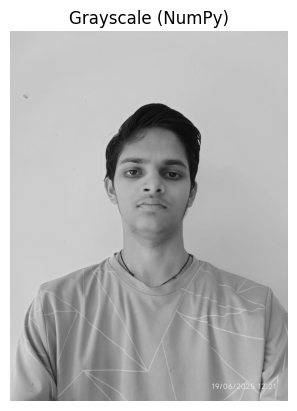

NumPy Gray Shape: (1152, 864)


In [17]:
# convert to grayscale using numpy
gray_numpy = (0.299 * img_rgb[:, :, 0] +0.587 * img_rgb[:, :, 1] + 0.114 * img_rgb[:, :, 2]).astype(np.uint8)
plt.imshow(gray_numpy, cmap='gray')
plt.title("Grayscale (NumPy)")
plt.axis("off")
plt.show()

print("NumPy Gray Shape:", gray_numpy.shape)


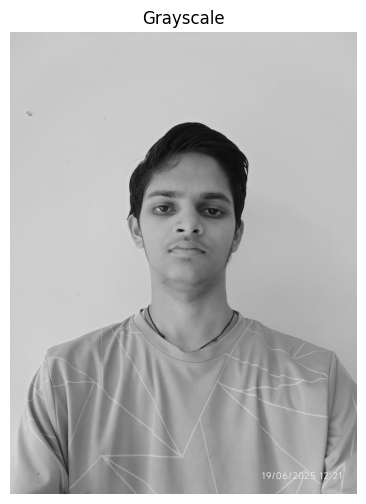

In [20]:
#convert to grayscale using cvtColor
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_cv, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()

In [21]:
print("Sample comparisons at pixel (50,50):")
print("RGB Pixel:", img_rgb[50, 50])
print("NumPy Gray Pixel:", gray_numpy[50, 50])
print("OpenCV Gray Pixel:", gray_cv[50, 50])


Sample comparisons at pixel (50,50):
RGB Pixel: [216 196 185]
NumPy Gray Pixel: 200
OpenCV Gray Pixel: 201


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [26]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.
# B1: Compute FFT of grayscale image

# convert to float for math
gray_float = gray_numpy.astype(np.float32)

# Step 1: 2D FFT
F = np.fft.fft2(gray_float)

# Step 2: Shift low frequencies to center
fshift = np.fft.fftshift(F)

print("FFT shape:", F.shape)
print("Shifted FFT shape (fshift):", fshift.shape)


FFT shape: (1152, 864)
Shifted FFT shape (fshift): (1152, 864)


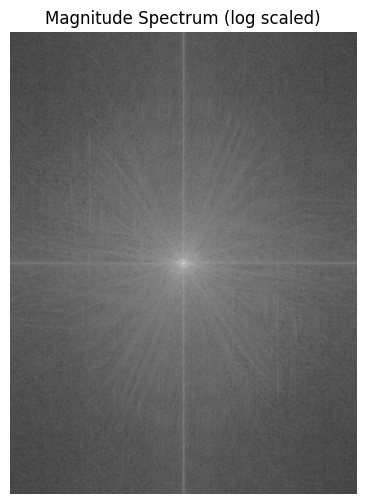

Magnitude shape: (1152, 864)
Phase shape: (1152, 864)


In [27]:
# B2: magnitude, phase and Magnitude Spectrum
# Magnitude and phase of shifted FFT
magnitude = np.abs(fshift)
phase = np.angle(fshift)
# Magnitude spectrum
magnitude_spectrum = np.log1p(magnitude)
plt.figure(figsize=(6,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (log scaled)")
plt.axis("off")
plt.show()

print("Magnitude shape:", magnitude.shape)
print("Phase shape:", phase.shape)

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

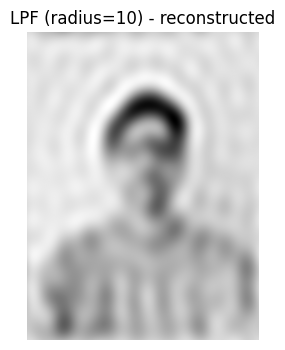

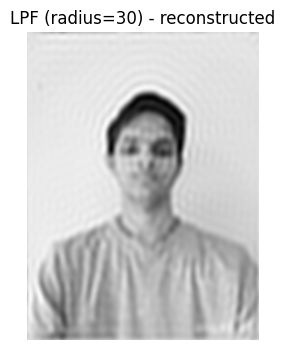

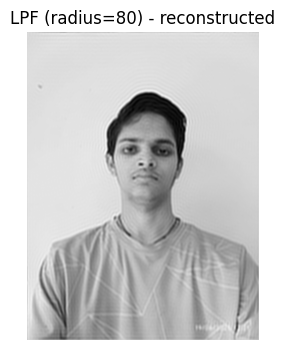

In [32]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

# load image (grayscale)
img_path = "my_image.jpeg"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
rows, cols = gray.shape
crow, ccol = rows//2, cols//2

# compute FFT and shift (center low freqs)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# helper: inverse transform from a shifted spectrum and display
def reconstruct_and_show(fshift_masked, title=""):
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_masked))
    img_back = np.abs(img_back)
    img_back = (img_back - img_back.min())/(img_back.max()-img_back.min()+1e-12) * 255.0
    img_back = img_back.astype(np.uint8)
    plt.figure(figsize=(6,4)); plt.axis('off'); plt.title(title)
    plt.imshow(img_back, cmap='gray'); plt.show()
    return img_back

# C1: Three circular LPF masks (radii 10, 30, 80)
radii = [10, 30, 80]

for r in radii:
    mask_lpf = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask_lpf, (ccol, crow), r, 1, -1)
    fshift_lpf = fshift * mask_lpf
    # reconstruct and show
    recon = reconstruct_and_show(fshift_lpf, title=f"LPF (radius={r}) - reconstructed")



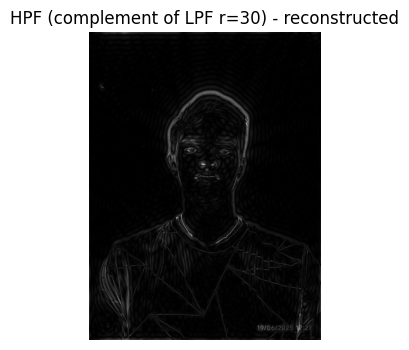

In [29]:
# C2: hpf mask
r_hpf = 30
mask_lpf_30 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf_30, (ccol, crow), r_hpf, 1, -1)
# HPF = complement of LPF
mask_hpf = 1 - mask_lpf_30
fshift_hpf = fshift * mask_hpf
recon_hpf = reconstruct_and_show(fshift_hpf, title=f"HPF (complement of LPF r={r_hpf}) - reconstructed")



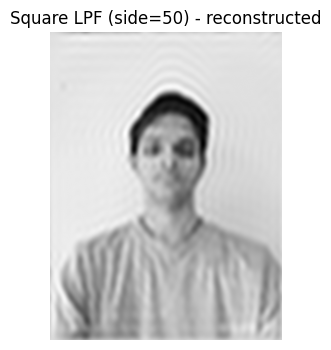

In [30]:
side = 50                              # side length of square in frequency domain
mask_square = np.zeros((rows, cols), np.uint8)
r0 = max(0, crow - side//2); r1 = min(rows, crow + side//2)
c0 = max(0, ccol - side//2); c1 = min(cols, ccol + side//2)
mask_square[r0:r1, c0:c1] = 1
fshift_square = fshift * mask_square
recon_square = reconstruct_and_show(fshift_square, title=f"Square LPF (side={side}) - reconstructed")


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

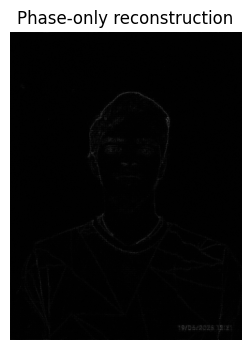

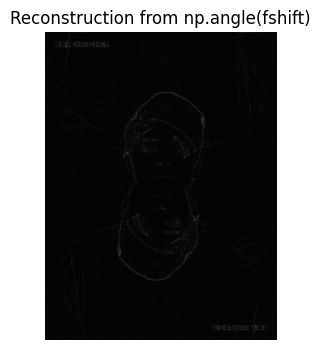

In [33]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.
# D1. Phase-only reconstruction

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1) Load image (grayscale)
img_path = "my_image.jpeg"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2) FFT + shift
f      = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# 3) Phase-only spectrum
# phase_only has magnitude 1 everywhere and same phase as original:
# F_phase(u,v) = e^{j * theta(u,v)}
# (we add a small epsilon to avoid division by zero)
phase_only = fshift / (np.abs(fshift) + 1e-12)

# 4) Reconstruct from phase-only spectrum
img_back_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_back_phase = np.abs(img_back_phase)
img_back_phase = (img_back_phase - img_back_phase.min()) / \
                 (img_back_phase.max() - img_back_phase.min() + 1e-12) * 255
img_back_phase = img_back_phase.astype(np.uint8)

plt.figure(figsize=(6,4))
plt.title("Phase-only reconstruction")
plt.axis('off')
plt.imshow(img_back_phase, cmap='gray')
plt.show()

# ----- EXTRA: using np.angle(fshift) like in lecture -----
angles = np.angle(fshift)  # this is ONLY the angle values (real numbers), NOT a complex spectrum

img_back_angle = np.fft.ifft2(np.fft.ifftshift(angles))
img_back_angle = np.abs(img_back_angle)
img_back_angle = (img_back_angle - img_back_angle.min()) / \
                 (img_back_angle.max() - img_back_angle.min() + 1e-12) * 255
img_back_angle = img_back_angle.astype(np.uint8)

plt.figure(figsize=(6,4))
plt.title("Reconstruction from np.angle(fshift)")
plt.axis('off')
plt.imshow(img_back_angle, cmap='gray')
plt.show()




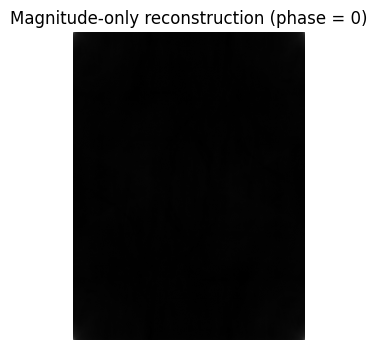

In [34]:
# D2. Magnitude-only reconstruction

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1) Load image (grayscale)
img_path = "my_image.jpeg"
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2) FFT + shift
f      = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)

# 3) Magnitude-only spectrum
mag_only = np.abs(fshift)          # this is |F(u,v)|

# To reconstruct, we need a COMPLEX spectrum.
# "Magnitude-only" means we keep |F| and set phase = 0 everywhere:
#     F_mag(u,v) = |F(u,v)| * e^{j*0} = |F(u,v)|
mag_only_complex = mag_only * np.exp(1j * 0)

# 4) Reconstruct from magnitude-only spectrum (zero phase)
img_back_mag = np.fft.ifft2(np.fft.ifftshift(mag_only_complex))
img_back_mag = np.abs(img_back_mag)
img_back_mag = (img_back_mag - img_back_mag.min()) / \
               (img_back_mag.max() - img_back_mag.min() + 1e-12) * 255
img_back_mag = img_back_mag.astype(np.uint8)

plt.figure(figsize=(6,4))
plt.title("Magnitude-only reconstruction (phase = 0)")
plt.axis('off')
plt.imshow(img_back_mag, cmap='gray')
plt.show()



## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

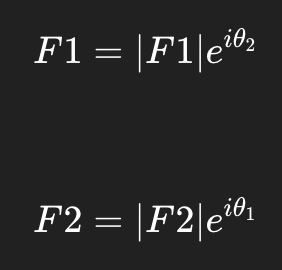

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.